In [1]:
import os
import subprocess
import sys

# ---------- Step 1: Create requirements.txt if missing ----------
requirements_content = """certifi==2023.5.7
cffi==1.15.1
charset-normalizer==3.1.0
colorama==0.4.6
cycler==0.11.0
ecg-plot==0.2.8
filelock==3.12.2
h5py==3.8.0
idna==3.4
Jinja2==3.1.2
kiwisolver==1.4.4
MarkupSafe==2.1.3
matplotlib==3.3.4
mpmath==1.3.0
networkx==3.1
numpy==1.25.0
pandas==2.0.2
Pillow==9.5.0
pycparser==2.21
pyparsing==3.1.0
python-dateutil==2.8.2
pytz==2023.3
requests==2.31.0
scipy==1.10.1
six==1.16.0
soundfile==0.12.1
sympy==1.12
torch==2.0.1
torchvision==0.2.2.post3
tqdm==4.65.0
typing_extensions==4.6.3
tzdata==2023.3
urllib3==2.0.3
wfdb==4.1.2
xmljson==0.2.1
"""

if not os.path.exists("requirements.txt"):
    with open("requirements.txt", "w") as f:
        f.write(requirements_content)
    print("✅ Created local requirements.txt file.")
else:
    print("📄 requirements.txt already exists. Using existing file.")

# ---------- Step 2: Upgrade pip, setuptools, wheel ----------
print("\n🚀 Upgrading pip, setuptools, and wheel...")
subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "pip", "setuptools", "wheel"], check=True)
print("✅ pip, setuptools, wheel upgraded successfully.")

# ---------- Step 3: Install requirements ----------
print("\n📦 Installing all dependencies from requirements.txt...")
subprocess.run([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"], check=True)
print("✅ All dependencies installed successfully.")


📄 requirements.txt already exists. Using existing file.

🚀 Upgrading pip, setuptools, and wheel...
✅ pip, setuptools, wheel upgraded successfully.

📦 Installing all dependencies from requirements.txt...


CalledProcessError: Command '['C:\\Users\\BDITUsers\\jupyter39-venv\\Scripts\\python.exe', '-m', 'pip', 'install', '-r', 'requirements.txt']' returned non-zero exit status 1.

In [1]:
pip install -U matplotlib matplotlib-inline

In [3]:
pip uninstall -y matplotlib matplotlib-inline kiwisolver cycler pillow

Found existing installation: matplotlib 3.10.7
Uninstalling matplotlib-3.10.7:
  Successfully uninstalled matplotlib-3.10.7
Found existing installation: matplotlib-inline 0.2.1
Uninstalling matplotlib-inline-0.2.1:
  Successfully uninstalled matplotlib-inline-0.2.1
Found existing installation: kiwisolver 1.4.9
Uninstalling kiwisolver-1.4.9:
  Successfully uninstalled kiwisolver-1.4.9
Found existing installation: cycler 0.12.1
Uninstalling cycler-0.12.1:
  Successfully uninstalled cycler-0.12.1
Found existing installation: pillow 11.3.0
Uninstalling pillow-11.3.0:
  Successfully uninstalled pillow-11.3.0
Note: you may need to restart the kernel to use updated packages.


matplotlib: 3.9.4


C:\Users\BDITUsers\jupyter39-venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


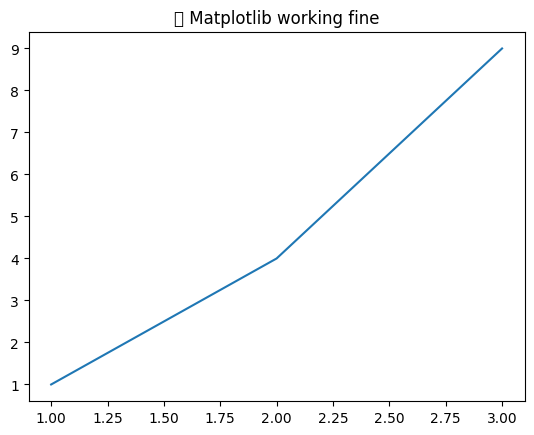

In [2]:
import matplotlib.pyplot as plt
import matplotlib
print("matplotlib:", matplotlib.__version__)

plt.plot([1,2,3], [1,4,9])
plt.title("✅ Matplotlib working fine")
plt.show()


In [3]:
#!pip install torch --index-url https://download.pytorch.org/whl/cpu

# Import
import torch
import torch.nn as nn
import numpy as np
from tqdm.notebook import trange, tqdm
import h5py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# 2. clone the code files for data preprocessing
import os
import subprocess

# Helper function to check if a file/folder exists
def exists(path):
    val = os.path.exists(path)
    if val:
        print(f"'{path}' already exists. Using cached copy. Delete it manually if you want to re-clone.")
    return val

# 2. Clone the code files for data preprocessing
if not exists('ecg-preprocessing'):
    try:
        subprocess.run(
            ['git', 'clone', 'https://github.com/paulhausner/ecg-preprocessing.git'],
            check=True
        )
        print("✅ Repository cloned successfully.")
    except subprocess.CalledProcessError as e:
        print("❌ Git clone failed:", e)
else:
    print("✔️ Repository already exists — skipping clone.")


✅ Repository cloned successfully.


<Figure size 1200x800 with 0 Axes>

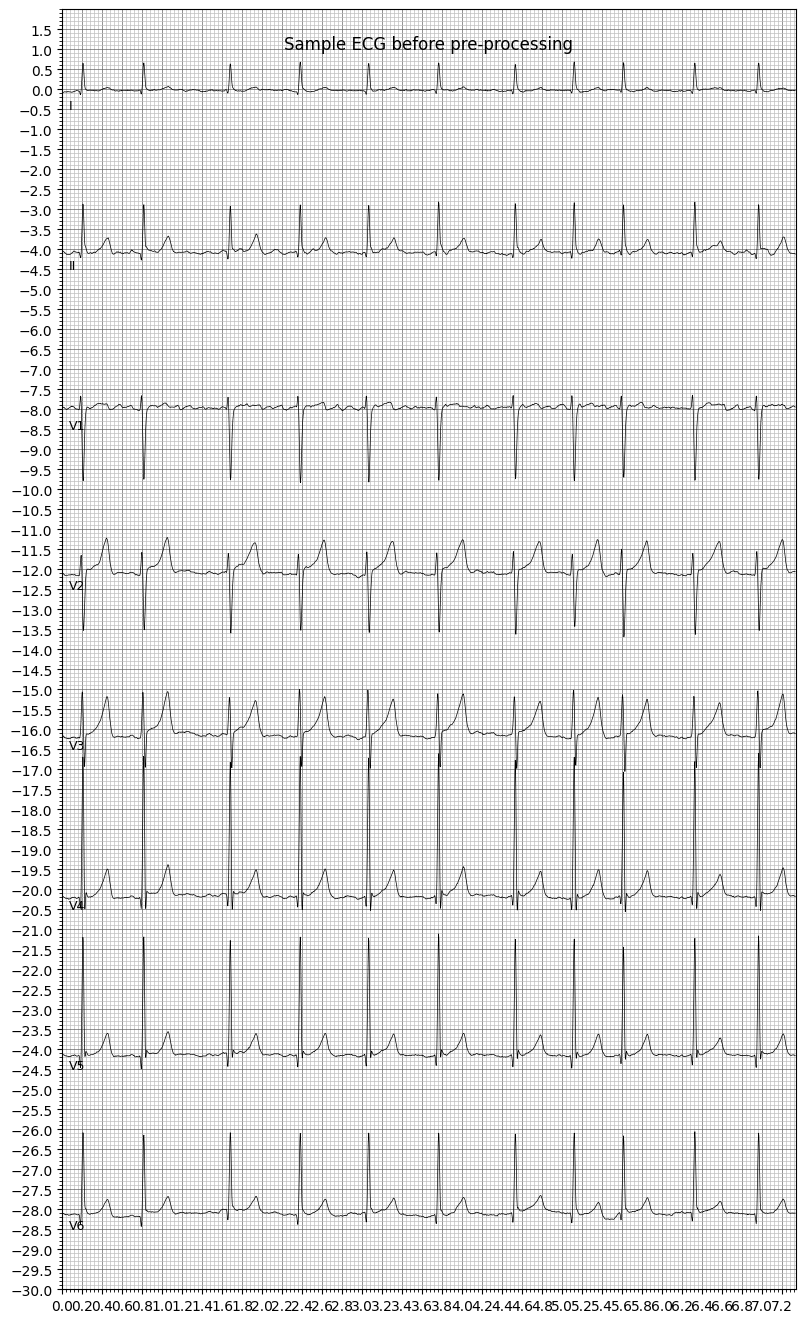

In [1]:
import sys
import os
import ecg_plot
import matplotlib.pyplot as plt

# --- Ensure the ecg-preprocessing folder is importable ---
sys.path.append(os.path.abspath("ecg-preprocessing"))

# --- Import read_ecg from the preprocessing script ---
from read_ecg import read_ecg

# --- Path to your ECG file ---
PATH_TO_WFDB = 'codesubset/train/TNMG100046'

# --- Read ECG ---
ecg_sample, sample_rate, _ = read_ecg(PATH_TO_WFDB)

# --- Plot ECG ---
plt.figure(figsize=(12, 8))
lead = ['I', 'II', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ecg_plot.plot(
    ecg_sample,
    sample_rate=sample_rate,
    style='bw',
    row_height=8,
    lead_index=lead,
    columns=1,
    title='Sample ECG before pre-processing'
)
plt.show()


Namespace(path='codesubset/train/TNMG100046', save='', remove_baseline=True, new_len=4096, new_freq=400.0, scale=1, use_all_leads=False, powerline=60.0, fmt='wfdb')


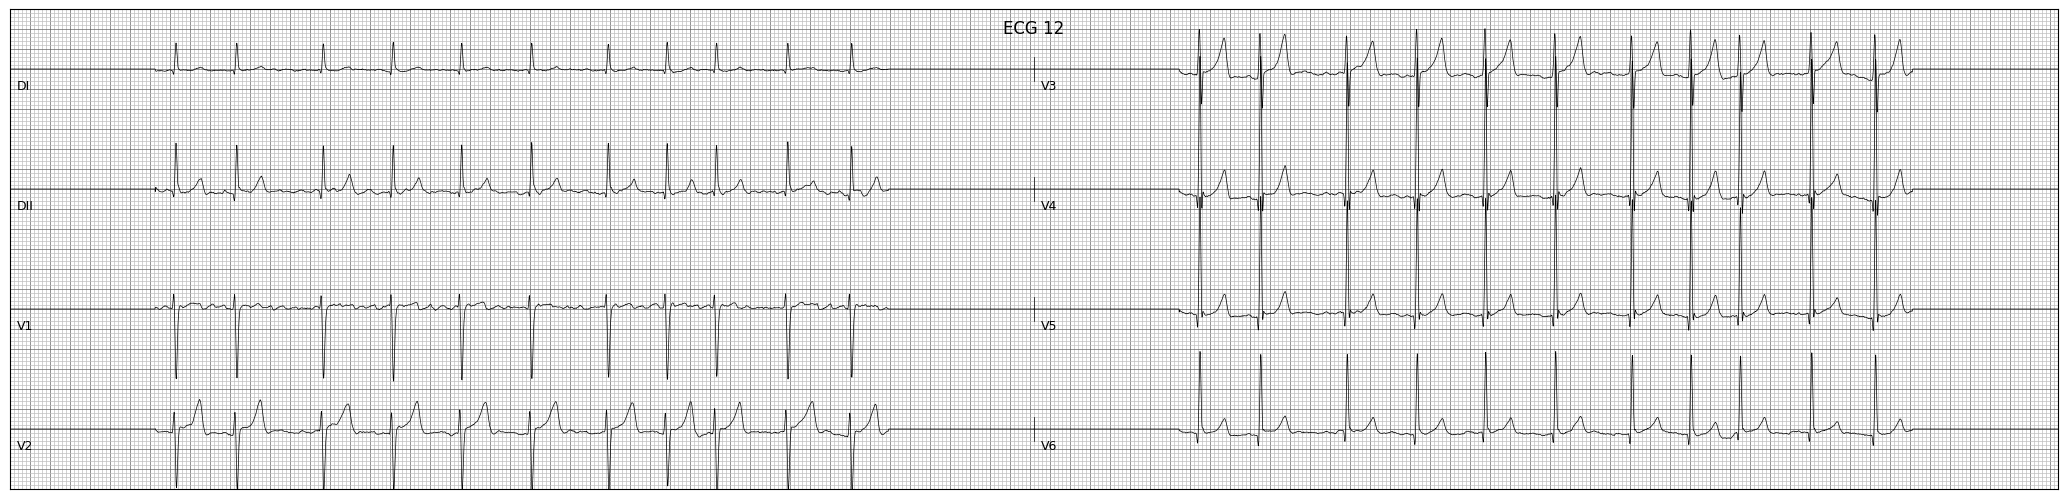

In [2]:
%run ecg-preprocessing/plot_from_ecg.py codesubset/train/TNMG100046 --new_freq 400 --new_len 4096 --remove_baseline --powerline 60

In [5]:
from pathlib import Path

train_file = Path("codesubset/train.h5")
test_file = Path("codesubset/test.h5")

if not train_file.exists():
    !python ecg-preprocessing/generate_h5.py --new_freq 400 --new_len 4096 --remove_baseline --powerline 60 codesubset/train/RECORDS.txt codesubset/train.h5

if not test_file.exists():
    !python ecg-preprocessing/generate_h5.py --new_freq 400 --new_len 4096 --remove_baseline --powerline 60 codesubset/test/RECORDS.txt codesubset/test.h5

HDF5 keys: ['tracings']
ECG data shape: (10000, 4096, 8)
   id_exam  id_patient  age sex  AF   date_exam
0  4255896          82   87   F   1  2012-08-10
1  3155370         208   72   M   1  2011-09-15
2  2765516         235   71   M   1  2010-09-21
3  4210953         241   73   M   1  2012-06-21
4   928865         255   80   M   1  2015-02-09


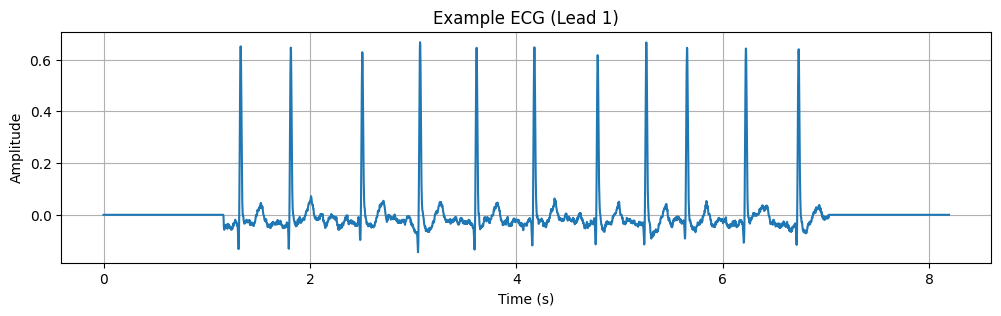

In [6]:
#Reading HDF5 and plotting an ECG
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ======================
# 1. LOAD ECG DATA (.h5)
# ======================
file_path = "codesubset/train.h5"

with h5py.File(file_path, "r") as f:
    print("HDF5 keys:", list(f.keys()))   # ['tracings']
    ecg_data = f['tracings'][:]           # (N, time, leads)

print("ECG data shape:", ecg_data.shape)


# ======================
# 2. LOAD METADATA (.csv)
# ======================
csv_path = "codesubset/train.csv"

df = pd.read_csv(csv_path)
print(df.head())

# Assuming train.csv contains columns like:
# id, label, age, sex
# (Adjust names to match your file.)


# Extract metadata
labels = df["AF"].values
age_data = df["age"].values
sex_data = df["sex"].values     # typically 0=female, 1=male


# ======================
# 3. PLOT ONE ECG
# ======================
def ecg_plot(signal, fs=500):
    t = np.arange(signal.shape[0]) / fs
    plt.figure(figsize=(12, 3))
    plt.plot(t, signal)
    plt.title("Example ECG (Lead 1)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

# Plot first ECG, first lead
ecg_plot(ecg_data[0][:, 0])



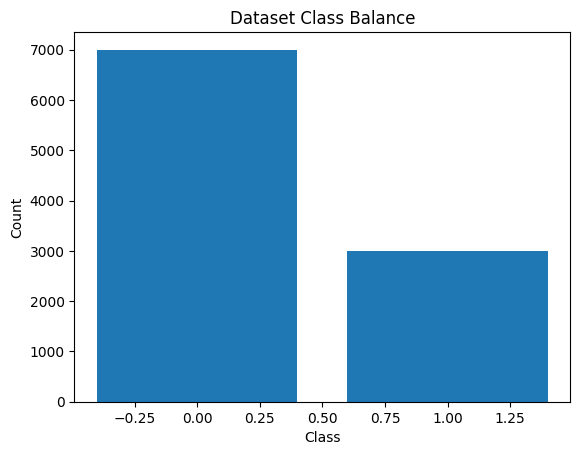

Class distribution: {0: 7000, 1: 3000}


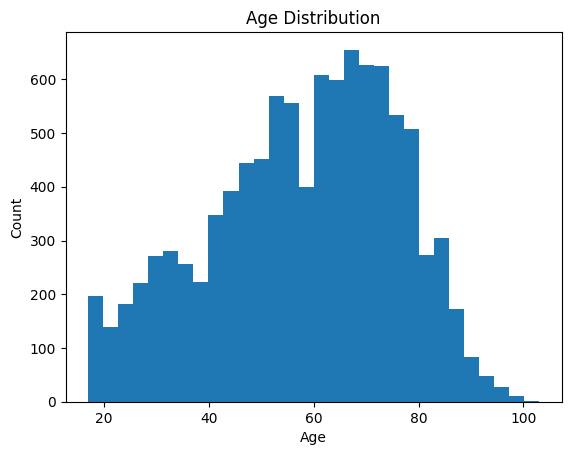

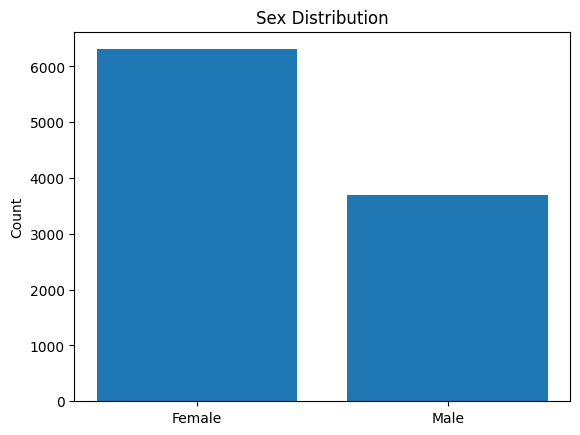

Sex distribution: {'Female': 6307, 'Male': 3693}


In [7]:
# ======================
# 4. CLASS BALANCE
# ======================
unique, counts = np.unique(labels, return_counts=True)

plt.bar(unique, counts)
plt.title("Dataset Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Class distribution:", dict(zip(unique, counts)))

# ======================
# 5. AGE DISTRIBUTION
# ======================
plt.hist(age_data, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# ======================
# 6. SEX DISTRIBUTION
# ======================
unique_s, counts_s = np.unique(sex_data, return_counts=True)

plt.bar(["Female", "Male"], counts_s)
plt.title("Sex Distribution")
plt.ylabel("Count")
plt.show()

print("Sex distribution:", dict(zip(["Female", "Male"], counts_s)))

In [8]:
#Model
import torch
import torch.nn as nn
import numpy as np

class ModelBaseline(nn.Module):
    def __init__(self, args=None):
        super(ModelBaseline, self).__init__()

        self.kernel_size = 3

        # Compute stride so that 4096 --> 128
        downsample = self._downsample(4096, 128)

        # 1D Convolution
        # Input:  8 channels (ECG leads)
        # Output: 32 channels
        # Stride: downsample factor to shrink sequence length
        self.conv1 = nn.Conv1d(
            in_channels=8,
            out_channels=32,
            kernel_size=self.kernel_size,
            stride=downsample,
            padding=self._padding(downsample),
            bias=False
        )

        # Linear classifier
        # Flatten size is 32 channels * 128 samples = 4096
        self.lin = nn.Linear(
            in_features=32 * 128,
            out_features=1  # binary classification
        )

        self.relu = nn.ReLU()

    def _padding(self, downsample):
        # compute padding to keep shape consistent
        return max(0, int(np.floor((self.kernel_size - downsample + 1) / 2)))

    def _downsample(self, seq_len_in, seq_len_out):
        # Compute integer stride
        return seq_len_in // seq_len_out

    def forward(self, x):
        # x shape: (batch, seq_len, leads) = (B, 4096, 8)
        
        # Conv1d expects (batch, channels, seq_len)
        x = x.transpose(2, 1)

        # Apply conv layer and ReLU
        x = self.relu(self.conv1(x))

        # Flatten everything
        x_flat = x.view(x.size(0), -1)

        # Linear classification output
        x = self.lin(x_flat)

        return x

In [9]:
#Uses of Conv1d Model
import torch

# Initialize model
model = ModelBaseline()

# Example batch of ECGs (first 32 samples)
ecg_batch = torch.tensor(ecg_data[:32], dtype=torch.float32)

# Forward pass
output = model(ecg_batch)  # shape: (32, 1)

# Convert to probability
prob = torch.sigmoid(output)

# Binary prediction
pred = (prob > 0.5).int()

print("Predicted probabilities:", prob.squeeze().tolist())
print("Predicted AF labels:", pred.squeeze().tolist())


Predicted probabilities: [0.49399369955062866, 0.5058665871620178, 0.4972434937953949, 0.4952193796634674, 0.43842315673828125, 0.5078940391540527, 0.49627619981765747, 0.49386993050575256, 0.4969426691532135, 0.4953392446041107, 0.4938409626483917, 0.4853177070617676, 0.500526487827301, 0.5126373171806335, 0.4902789294719696, 0.5104231834411621, 0.49504250288009644, 0.49985602498054504, 0.4867269694805145, 0.5029177069664001, 0.49587902426719666, 0.4972592294216156, 0.4943142533302307, 0.5001829862594604, 0.509958028793335, 0.49746930599212646, 0.48234447836875916, 0.48836052417755127, 0.49324560165405273, 0.48652389645576477, 0.513298511505127, 0.5058454275131226]
Predicted AF labels: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]


In [10]:
#Transformer Model
import torch
import torch.nn as nn

class ECGTransformer(nn.Module):
    def __init__(self, input_dim=8, embed_dim=64, num_heads=8, num_layers=2, seq_len=4096, downsample=32):
        """
        Transformer-based ECG model for binary classification

        Args:
            input_dim: Number of ECG leads (features) per time step
            embed_dim: Embedding dimension for transformer
            num_heads: Number of attention heads
            num_layers: Number of transformer encoder layers
            seq_len: Original sequence length (4096)
            downsample: Factor to reduce sequence length to reduce memory
        """
        super().__init__()

        # Optional linear embedding to higher dimension
        self.embedding = nn.Linear(input_dim, embed_dim)

        # Reduce sequence length via Conv1D before Transformer
        self.conv_downsample = nn.Conv1d(
            in_channels=embed_dim, 
            out_channels=embed_dim, 
            kernel_size=downsample, 
            stride=downsample
        )

        # Compute downsampled sequence length
        self.seq_len_down = seq_len // downsample

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=embed_dim*4,
            dropout=0.1,
            activation='relu'
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Classification head
        self.fc = nn.Linear(embed_dim * self.seq_len_down, 1)

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        x = self.embedding(x)          # (batch, seq_len, embed_dim)
        x = x.transpose(1, 2)          # (batch, embed_dim, seq_len)
        x = self.conv_downsample(x)    # (batch, embed_dim, seq_len_down)
        x = x.transpose(1, 2)          # (batch, seq_len_down, embed_dim)

        # Transformer expects (seq_len_down, batch, embed_dim)
        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x.transpose(0, 1).contiguous()  # (batch, seq_len_down, embed_dim)

        # Flatten and classify
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [11]:
#Uses of Transformer Model
import torch

# Initialize model
model = ECGTransformer()

# Example batch of ECGs (first 32 samples)
ecg_batch = torch.tensor(ecg_data[:32], dtype=torch.float32)

# Forward pass
output = model(ecg_batch)  # shape: (32, 1)

# Convert to probability
prob = torch.sigmoid(output)

# Binary prediction
pred = (prob > 0.5).int()

print("Predicted probabilities:", prob.squeeze().tolist())
print("Predicted AF labels:", pred.squeeze().tolist())

Predicted probabilities: [0.2451488971710205, 0.22117489576339722, 0.2599567174911499, 0.29559311270713806, 0.23116016387939453, 0.21948876976966858, 0.2568947672843933, 0.2495487779378891, 0.2871028184890747, 0.3041037619113922, 0.24752265214920044, 0.2033281773328781, 0.291810005903244, 0.25828757882118225, 0.3052312135696411, 0.19721192121505737, 0.2760913074016571, 0.26633700728416443, 0.24304863810539246, 0.30562305450439453, 0.27695930004119873, 0.3194331228733063, 0.2456413209438324, 0.19582988321781158, 0.21568146347999573, 0.2807835638523102, 0.3069280982017517, 0.20298561453819275, 0.3049142062664032, 0.31632694602012634, 0.2932605445384979, 0.285552054643631]
Predicted AF labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
#Conformer Model
import torch
import torch.nn as nn
import torch.nn.functional as F

class ECGConformerBlock(nn.Module):
    """Single Conformer Block: Conv + Multihead Attention + Feedforward"""
    def __init__(self, dim, num_heads, conv_kernel=31, ff_expansion=4, dropout=0.1):
        super().__init__()
        self.ff1 = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, ff_expansion*dim),
            nn.ReLU(),
            nn.Linear(ff_expansion*dim, dim),
            nn.Dropout(dropout)
        )
        self.mha = nn.MultiheadAttention(embed_dim=dim, num_heads=num_heads, batch_first=True, dropout=dropout)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=conv_kernel, padding=conv_kernel//2, groups=dim),
            nn.ReLU(),
            nn.BatchNorm1d(dim)
        )
        self.ff2 = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, ff_expansion*dim),
            nn.ReLU(),
            nn.Linear(ff_expansion*dim, dim),
            nn.Dropout(dropout)
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        # Feedforward 1
        x = x + 0.5 * self.ff1(x)

        # Multihead attention
        attn_out, _ = self.mha(x, x, x)
        x = x + attn_out

        # Convolution module
        x_conv = x.transpose(1, 2)
        x_conv = self.conv(x_conv)
        x_conv = x_conv.transpose(1, 2)
        x = x + x_conv

        # Feedforward 2
        x = x + 0.5 * self.ff2(x)
        x = self.norm(x)
        return x

class ECGConformer(nn.Module):
    def __init__(self, input_dim=8, embed_dim=64, num_heads=8, num_blocks=2, seq_len=4096, downsample=32):
        super().__init__()
        # Linear embedding
        self.embedding = nn.Linear(input_dim, embed_dim)

        # Reduce sequence length
        self.conv_downsample = nn.Conv1d(embed_dim, embed_dim, kernel_size=downsample, stride=downsample)
        self.seq_len_down = seq_len // downsample

        # Conformer blocks
        self.blocks = nn.ModuleList([ECGConformerBlock(embed_dim, num_heads) for _ in range(num_blocks)])

        # Classification head
        self.fc = nn.Linear(embed_dim * self.seq_len_down, 1)

    def forward(self, x):
        x = self.embedding(x)          # (batch, seq_len, embed_dim)
        x = x.transpose(1, 2)          # (batch, embed_dim, seq_len)
        x = self.conv_downsample(x)    # downsample
        x = x.transpose(1, 2)          # (batch, seq_len_down, embed_dim)

        for block in self.blocks:
            x = block(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [13]:
#Uses of the Conformer Model
import torch

# Initialize model
model = ECGTransformer()

# Example batch of ECGs (first 32 samples)
ecg_batch = torch.tensor(ecg_data[:32], dtype=torch.float32)

# Forward pass
output = model(ecg_batch)  # shape: (32, 1)

# Convert to probability
prob = torch.sigmoid(output)

# Binary prediction
pred = (prob > 0.5).int()

print("Predicted probabilities:", prob.squeeze().tolist())
print("Predicted AF labels:", pred.squeeze().tolist())

Predicted probabilities: [0.24789467453956604, 0.24262124300003052, 0.2990003824234009, 0.29317834973335266, 0.4519317150115967, 0.2803190350532532, 0.2847849428653717, 0.32813021540641785, 0.33555442094802856, 0.27086666226387024, 0.31268057227134705, 0.3064068555831909, 0.27496010065078735, 0.2388245165348053, 0.3209371268749237, 0.2811034917831421, 0.2887718677520752, 0.2532223165035248, 0.2819042503833771, 0.3608662188053131, 0.22897696495056152, 0.31881630420684814, 0.3190898001194, 0.24268974363803864, 0.3201450705528259, 0.22333532571792603, 0.3318784236907959, 0.2581111788749695, 0.2726365029811859, 0.29961907863616943, 0.24112673103809357, 0.29658642411231995]
Predicted AF labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


True AF labels:        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Conv1D predictions:    [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Transformer predictions: [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Conformer predictions:   [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


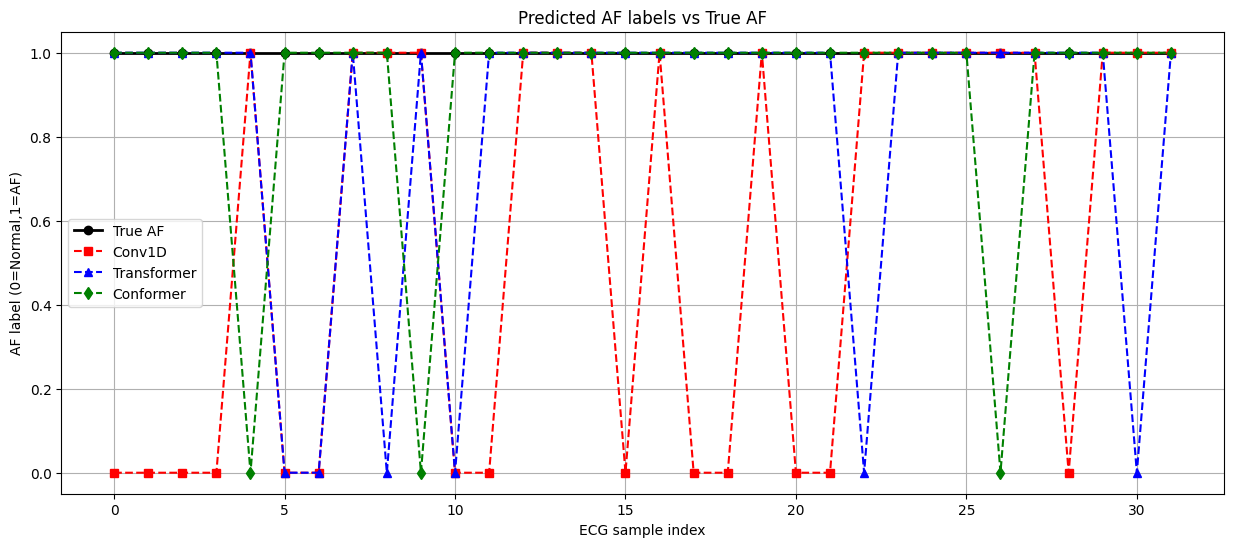

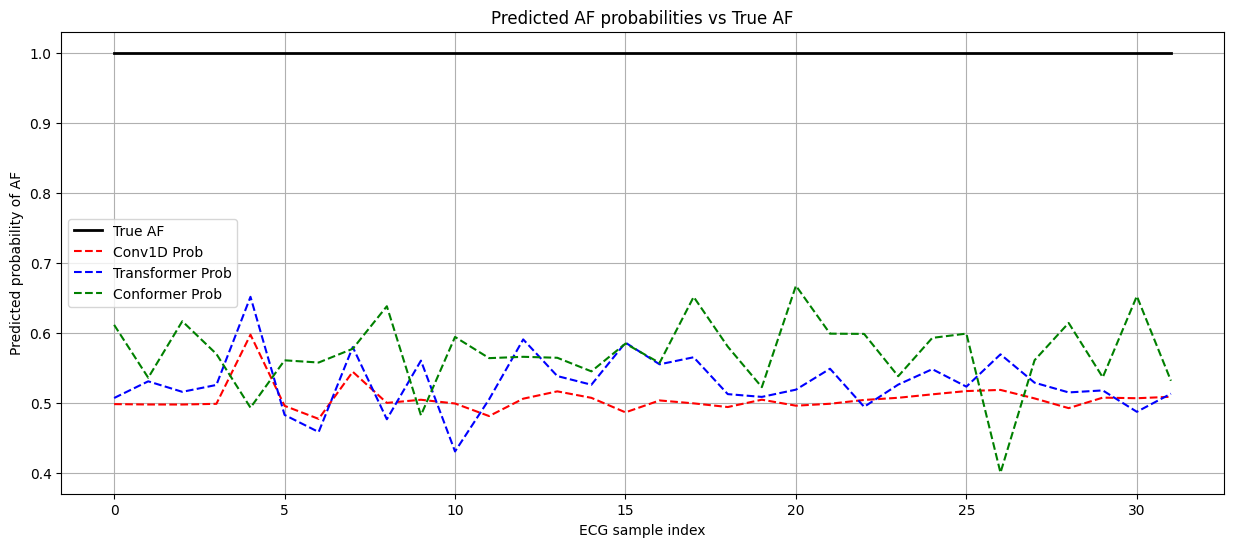

In [14]:
#Compare Three Models and Plot
import torch
import matplotlib.pyplot as plt
import numpy as np
# ---- Initialize models ----
conv_model = ModelBaseline()
transformer_model = ECGTransformer()
conformer_model = ECGConformer()
# ---- Select example batch ----
batch_size = 32
ecg_batch = torch.tensor(ecg_data[:batch_size], dtype=torch.float32)
true_labels = torch.tensor(labels[:batch_size], dtype=torch.int)  # AF labels 0/1
# ---- Helper function for predictions ----
def get_predictions(model, ecg_batch):
    model.eval()
    with torch.no_grad():
        out = model(ecg_batch)
        prob = torch.sigmoid(out).squeeze()
        pred = (prob > 0.5).int()
    return prob.numpy(), pred.numpy()
# ---- Get predictions for all models ----
conv_prob, conv_pred = get_predictions(conv_model, ecg_batch)
trans_prob, trans_pred = get_predictions(transformer_model, ecg_batch)
conf_prob, conf_pred = get_predictions(conformer_model, ecg_batch)
# ---- Print predictions ----
print("True AF labels:       ", true_labels.tolist())
print("Conv1D predictions:   ", conv_pred.tolist())
print("Transformer predictions:", trans_pred.tolist())
print("Conformer predictions:  ", conf_pred.tolist())
# ---- Plotting ----
x = np.arange(batch_size)

plt.figure(figsize=(15, 6))

plt.plot(x, true_labels.numpy(), 'k-o', label='True AF', linewidth=2)
plt.plot(x, conv_pred, 'r--s', label='Conv1D')
plt.plot(x, trans_pred, 'b--^', label='Transformer')
plt.plot(x, conf_pred, 'g--d', label='Conformer')

plt.xlabel("ECG sample index")
plt.ylabel("AF label (0=Normal,1=AF)")
plt.title("Predicted AF labels vs True AF")
plt.legend()
plt.grid(True)
plt.show()

# Optional: plot predicted probabilities instead of binary labels
plt.figure(figsize=(15,6))
plt.plot(x, true_labels.numpy(), 'k-', label='True AF', linewidth=2)
plt.plot(x, conv_prob, 'r--', label='Conv1D Prob')
plt.plot(x, trans_prob, 'b--', label='Transformer Prob')
plt.plot(x, conf_prob, 'g--', label='Conformer Prob')
plt.xlabel("ECG sample index")
plt.ylabel("Predicted probability of AF")
plt.title("Predicted AF probabilities vs True AF")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#Conv1D model Fill Training loop

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# -------------------------
# 1. Define Dataset
# -------------------------
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        """
        ecg_data: numpy array of shape (n_samples, 4096, 8)
        labels: numpy array of shape (n_samples,)
        """
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# -------------------------
# 2. Prepare DataLoader
# -------------------------
batch_size = 32
train_dataset = ECGDataset(ecg_data, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------
# 3. Initialize Model, Loss, Optimizer
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ModelBaseline().to(device)
loss_fn = nn.BCEWithLogitsLoss()  # for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# -------------------------
# 4. Training Loop
# -------------------------
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)

    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        # ===== TRAINING STEP =====
        pred = model(traces)                              # forward pass
        loss = loss_function(pred.squeeze(), diagnoses.float())  # compute loss
        loss.backward()                                   # backward pass
        optimizer.step()                                  # update weights
        optimizer.zero_grad()                             # reset gradients
        # ========================

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# -------------------------
# 5. Run Training for few epochs
# -------------------------
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    avg_loss = train_loop(epoch, train_loader, model, optimizer, loss_fn, device)
    print(f"Epoch {epoch}: Average Loss = {avg_loss:.4f}")

Training Epoch 1: 100%|█████████████████████████████████████████████████| 313/313 [00:05<00:00, 62.26it/s, loss=0.0196]


Epoch 1: Average Loss = 0.0196


Training Epoch 2: 100%|██████████████████████████████████████████████████| 313/313 [00:04<00:00, 69.89it/s, loss=0.019]


Epoch 2: Average Loss = 0.0190


Training Epoch 3: 100%|█████████████████████████████████████████████████| 313/313 [00:04<00:00, 72.80it/s, loss=0.0187]


Epoch 3: Average Loss = 0.0187


Training Epoch 4: 100%|█████████████████████████████████████████████████| 313/313 [00:05<00:00, 57.25it/s, loss=0.0184]


Epoch 4: Average Loss = 0.0184


Training Epoch 5: 100%|█████████████████████████████████████████████████| 313/313 [00:05<00:00, 61.19it/s, loss=0.0182]

Epoch 5: Average Loss = 0.0182


In [24]:
#Transformer Model for Training Loop
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# -------------------------
# 1. Define Dataset
# -------------------------
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        """
        ecg_data: numpy array of shape (n_samples, 4096, 8)
        labels: numpy array of shape (n_samples,)
        """
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# -------------------------
# 2. Prepare DataLoader
# -------------------------
batch_size = 32
train_dataset = ECGDataset(ecg_data, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------
# 3. Initialize Model, Loss, Optimizer
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ECGTransformer().to(device)
loss_fn = nn.BCEWithLogitsLoss()  # for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# -------------------------
# 4. Training Loop
# -------------------------
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)

    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        # ===== TRAINING STEP =====
        pred = model(traces)                              # forward pass
        loss = loss_function(pred.squeeze(), diagnoses.float())  # compute loss
        loss.backward()                                   # backward pass
        optimizer.step()                                  # update weights
        optimizer.zero_grad()                             # reset gradients
        # ========================

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# -------------------------
# 5. Run Training for few epochs
# -------------------------
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    avg_loss = train_loop(epoch, train_loader, model, optimizer, loss_fn, device)
    print(f"Epoch {epoch}: Average Loss = {avg_loss:.4f}")

Training Epoch 1: 100%|█████████████████████████████████████████████████| 313/313 [02:24<00:00,  2.17it/s, loss=0.0212]


Epoch 1: Average Loss = 0.0212


Training Epoch 2: 100%|█████████████████████████████████████████████████| 313/313 [02:28<00:00,  2.10it/s, loss=0.0197]


Epoch 2: Average Loss = 0.0197


Training Epoch 3: 100%|█████████████████████████████████████████████████| 313/313 [02:31<00:00,  2.07it/s, loss=0.0196]


Epoch 3: Average Loss = 0.0196


Training Epoch 4: 100%|█████████████████████████████████████████████████| 313/313 [02:33<00:00,  2.04it/s, loss=0.0196]


Epoch 4: Average Loss = 0.0196


Training Epoch 5: 100%|█████████████████████████████████████████████████| 313/313 [02:49<00:00,  1.85it/s, loss=0.0193]

Epoch 5: Average Loss = 0.0193


In [25]:
#Conformer Model for Training Loop
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# -------------------------
# 1. Define Dataset
# -------------------------
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        """
        ecg_data: numpy array of shape (n_samples, 4096, 8)
        labels: numpy array of shape (n_samples,)
        """
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# -------------------------
# 2. Prepare DataLoader
# -------------------------
batch_size = 32
train_dataset = ECGDataset(ecg_data, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------
# 3. Initialize Model, Loss, Optimizer
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ECGConformer().to(device)
loss_fn = nn.BCEWithLogitsLoss()  # for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# -------------------------
# 4. Training Loop
# -------------------------
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)

    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        # ===== TRAINING STEP =====
        pred = model(traces)                              # forward pass
        loss = loss_function(pred.squeeze(), diagnoses.float())  # compute loss
        loss.backward()                                   # backward pass
        optimizer.step()                                  # update weights
        optimizer.zero_grad()                             # reset gradients
        # ========================

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# -------------------------
# 5. Run Training for few epochs
# -------------------------
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    avg_loss = train_loop(epoch, train_loader, model, optimizer, loss_fn, device)
    print(f"Epoch {epoch}: Average Loss = {avg_loss:.4f}")

Training Epoch 1: 100%|█████████████████████████████████████████████████| 313/313 [02:44<00:00,  1.90it/s, loss=0.0209]


Epoch 1: Average Loss = 0.0209


Training Epoch 2: 100%|█████████████████████████████████████████████████| 313/313 [03:35<00:00,  1.45it/s, loss=0.0197]


Epoch 2: Average Loss = 0.0197


Training Epoch 3: 100%|█████████████████████████████████████████████████| 313/313 [04:06<00:00,  1.27it/s, loss=0.0194]


Epoch 3: Average Loss = 0.0194


Training Epoch 4: 100%|█████████████████████████████████████████████████| 313/313 [03:15<00:00,  1.60it/s, loss=0.0192]


Epoch 4: Average Loss = 0.0192


Training Epoch 5: 100%|█████████████████████████████████████████████████| 313/313 [03:13<00:00,  1.62it/s, loss=0.0189]

Epoch 5: Average Loss = 0.0189


Evaluation Epoch 1: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 148.24it/s, loss=0.0196]



Epoch 1 Summary:
Conv1D: Train Loss=0.0196, Val Loss=0.0196, Val AUROC=0.5032


Evaluation Epoch 2: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 146.17it/s, loss=0.0196]



Epoch 2 Summary:
Conv1D: Train Loss=0.0190, Val Loss=0.0196, Val AUROC=0.5129


Evaluation Epoch 3: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 143.51it/s, loss=0.0197]



Epoch 3 Summary:
Conv1D: Train Loss=0.0187, Val Loss=0.0197, Val AUROC=0.5121


Evaluation Epoch 4: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 132.79it/s, loss=0.0199]



Epoch 4 Summary:
Conv1D: Train Loss=0.0183, Val Loss=0.0199, Val AUROC=0.5119


Evaluation Epoch 5: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 134.62it/s, loss=0.0201]



Epoch 5 Summary:
Conv1D: Train Loss=0.0180, Val Loss=0.0201, Val AUROC=0.5097


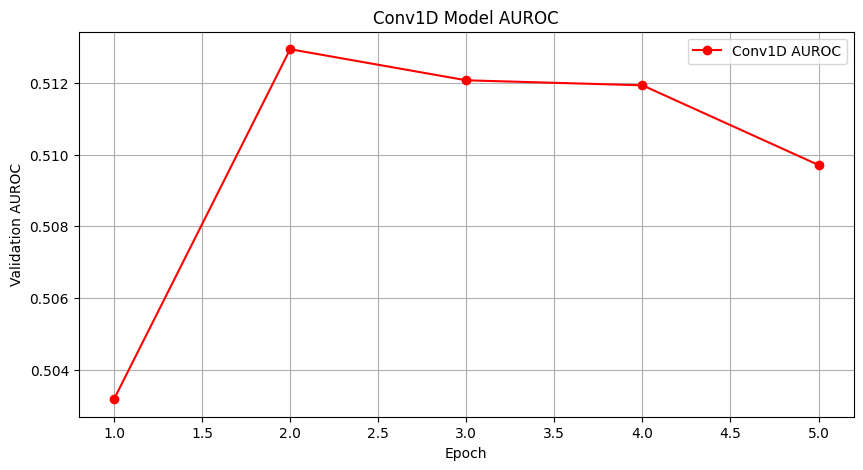

In [30]:
#Conformer Eval Function
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========================
# 1. Dataset Class
# ========================
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# ========================
# 2. Stratified Train/Validation Split
# ========================
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size=0.2,
    stratify=labels,    # preserves class distribution
    random_state=42
)

train_dataset = ECGDataset(ecg_data[train_idx], labels[train_idx])
val_dataset   = ECGDataset(ecg_data[val_idx], labels[val_idx])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ========================
# 3. Conv1D Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_model = ModelBaseline().to(device)  # Conv1D model

# ========================
# 4. Loss and Optimizer
# ========================
loss_fn = nn.BCEWithLogitsLoss()
conv_optimizer = torch.optim.Adam(conv_model.parameters(), lr=1e-3)

# ========================
# 5. Training Loop
# ========================
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)

    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        # ===== TRAINING STEP =====
        pred = model(traces)
        loss = loss_function(pred.squeeze(), diagnoses.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # ========================

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# ========================
# 6. Evaluation Loop
# ========================
def eval_loop(epoch, dataloader, model, loss_function, device):
    model.eval()
    total_loss = 0
    n_entries = 0
    valid_probs = []
    valid_true = []

    eval_pbar = tqdm(dataloader, desc=f"Evaluation Epoch {epoch}", leave=True)
    
    for traces_cpu, diagnoses_cpu in eval_pbar:
        traces, diagnoses = traces_cpu.to(device), diagnoses_cpu.to(device)

        with torch.no_grad():
            pred = model(traces)
            loss = loss_function(pred.squeeze(), diagnoses.float())
            prob = torch.sigmoid(pred)
            valid_probs.append(prob.detach().cpu().numpy())
            valid_true.append(diagnoses.detach().cpu().numpy())

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        eval_pbar.set_postfix({'loss': total_loss / n_entries})

    eval_pbar.close()
    return total_loss / n_entries, np.concatenate(valid_probs, axis=0), np.concatenate(valid_true, axis=0)

# ========================
# 7. Full Training + Evaluation
# ========================
num_epochs = 5
history = {
    "conv_train_loss": [],
    "conv_val_loss": [],
    "conv_val_auroc": []
}

for epoch in range(1, num_epochs + 1):
    conv_train_loss = train_loop(epoch, train_loader, conv_model, conv_optimizer, loss_fn, device)
    conv_val_loss, conv_probs, conv_true = eval_loop(epoch, val_loader, conv_model, loss_fn, device)
    conv_auroc = roc_auc_score(conv_true, conv_probs)

    history["conv_train_loss"].append(conv_train_loss)
    history["conv_val_loss"].append(conv_val_loss)
    history["conv_val_auroc"].append(conv_auroc)

    print(f"\nEpoch {epoch} Summary:")
    print(f"Conv1D: Train Loss={conv_train_loss:.4f}, Val Loss={conv_val_loss:.4f}, Val AUROC={conv_auroc:.4f}")

# ========================
# 8. Plot Validation AUROC
# ========================
plt.figure(figsize=(10,5))
plt.plot(range(1,num_epochs+1), history["conv_val_auroc"], 'r-o', label="Conv1D AUROC")
plt.xlabel("Epoch")
plt.ylabel("Validation AUROC")
plt.title("Conv1D Model AUROC")
plt.legend()
plt.grid(True)
plt.show()

Evaluation Epoch 1: 100%|█████████████████████████████████████████████████| 63/63 [00:11<00:00,  5.46it/s, loss=0.0199]



Epoch 1 Summary:
Transformer: Train Loss=0.0212, Val Loss=0.0199, Val AUROC=0.4996


Evaluation Epoch 2: 100%|█████████████████████████████████████████████████| 63/63 [00:11<00:00,  5.31it/s, loss=0.0193]



Epoch 2 Summary:
Transformer: Train Loss=0.0199, Val Loss=0.0193, Val AUROC=0.4970


Evaluation Epoch 3: 100%|█████████████████████████████████████████████████| 63/63 [00:12<00:00,  4.92it/s, loss=0.0198]



Epoch 3 Summary:
Transformer: Train Loss=0.0198, Val Loss=0.0198, Val AUROC=0.5122


Evaluation Epoch 4: 100%|█████████████████████████████████████████████████| 63/63 [00:12<00:00,  5.09it/s, loss=0.0194]



Epoch 4 Summary:
Transformer: Train Loss=0.0196, Val Loss=0.0194, Val AUROC=0.5034


Evaluation Epoch 5: 100%|█████████████████████████████████████████████████| 63/63 [00:13<00:00,  4.74it/s, loss=0.0193]



Epoch 5 Summary:
Transformer: Train Loss=0.0193, Val Loss=0.0193, Val AUROC=0.5049


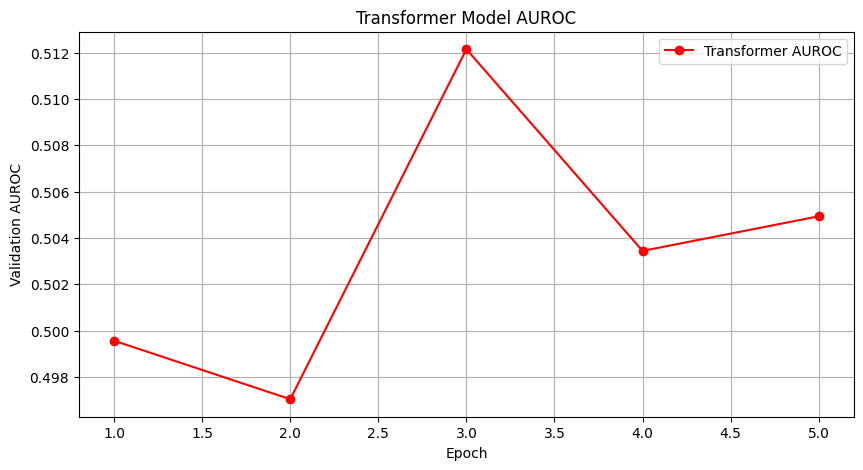

In [33]:
#Transformer Model Eval Function
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========================
# 1. Dataset Class
# ========================
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# ========================
# 2. Stratified Train/Validation Split
# ========================
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size=0.2,
    stratify=labels,    # preserves class distribution
    random_state=42
)

train_dataset = ECGDataset(ecg_data[train_idx], labels[train_idx])
val_dataset   = ECGDataset(ecg_data[val_idx], labels[val_idx])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ========================
# 3. Transformer Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trans_model = ECGTransformer().to(device)  # Transformer model

# ========================
# 4. Loss and Optimizer
# ========================
loss_fn = nn.BCEWithLogitsLoss()
trans_optimizer = torch.optim.Adam(trans_model.parameters(), lr=1e-3)

# ========================
# 5. Training Loop
# ========================
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)

    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        # ===== TRAINING STEP =====
        pred = model(traces)
        loss = loss_function(pred.squeeze(), diagnoses.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # ========================

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# ========================
# 6. Evaluation Loop
# ========================
def eval_loop(epoch, dataloader, model, loss_function, device):
    model.eval()
    total_loss = 0
    n_entries = 0
    valid_probs = []
    valid_true = []

    eval_pbar = tqdm(dataloader, desc=f"Evaluation Epoch {epoch}", leave=True)
    
    for traces_cpu, diagnoses_cpu in eval_pbar:
        traces, diagnoses = traces_cpu.to(device), diagnoses_cpu.to(device)

        with torch.no_grad():
            pred = model(traces)
            loss = loss_function(pred.squeeze(), diagnoses.float())
            prob = torch.sigmoid(pred)
            valid_probs.append(prob.detach().cpu().numpy())
            valid_true.append(diagnoses.detach().cpu().numpy())

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        eval_pbar.set_postfix({'loss': total_loss / n_entries})

    eval_pbar.close()
    return total_loss / n_entries, np.concatenate(valid_probs, axis=0), np.concatenate(valid_true, axis=0)

# ========================
# 7. Full Training + Evaluation
# ========================
num_epochs = 5
history = {
    "trans_train_loss": [],
    "trans_val_loss": [],
    "trans_val_auroc": []
}

for epoch in range(1, num_epochs + 1):
    trans_train_loss = train_loop(epoch, train_loader, trans_model, trans_optimizer, loss_fn, device)
    trans_val_loss, trans_probs, trans_true = eval_loop(epoch, val_loader, trans_model, loss_fn, device)
    trans_auroc = roc_auc_score(trans_true, trans_probs)

    history["trans_train_loss"].append(trans_train_loss)
    history["trans_val_loss"].append(trans_val_loss)
    history["trans_val_auroc"].append(trans_auroc)

    print(f"\nEpoch {epoch} Summary:")
    print(f"Transformer: Train Loss={trans_train_loss:.4f}, Val Loss={trans_val_loss:.4f}, Val AUROC={trans_auroc:.4f}")

# ========================
# 8. Plot Validation AUROC
# ========================
plt.figure(figsize=(10,5))
plt.plot(range(1,num_epochs+1), history["trans_val_auroc"], 'r-o', label="Transformer AUROC")
plt.xlabel("Epoch")
plt.ylabel("Validation AUROC")
plt.title("Transformer Model AUROC")
plt.legend()
plt.grid(True)
plt.show()

Evaluation Epoch 1: 100%|█████████████████████████████████████████████████| 63/63 [00:15<00:00,  4.11it/s, loss=0.0197]



Epoch 1 Summary:
Conformer: Train Loss=0.0211, Val Loss=0.0197, Val AUROC=0.5067


Evaluation Epoch 2: 100%|█████████████████████████████████████████████████| 63/63 [00:19<00:00,  3.30it/s, loss=0.0203]



Epoch 2 Summary:
Conformer: Train Loss=0.0197, Val Loss=0.0203, Val AUROC=0.5221


Evaluation Epoch 3: 100%|█████████████████████████████████████████████████| 63/63 [00:15<00:00,  4.03it/s, loss=0.0195]



Epoch 3 Summary:
Conformer: Train Loss=0.0195, Val Loss=0.0195, Val AUROC=0.5161


Evaluation Epoch 4: 100%|█████████████████████████████████████████████████| 63/63 [00:15<00:00,  4.09it/s, loss=0.0193]



Epoch 4 Summary:
Conformer: Train Loss=0.0191, Val Loss=0.0193, Val AUROC=0.5252


Evaluation Epoch 5: 100%|█████████████████████████████████████████████████| 63/63 [00:15<00:00,  4.02it/s, loss=0.0194]



Epoch 5 Summary:
Conformer: Train Loss=0.0189, Val Loss=0.0194, Val AUROC=0.5196


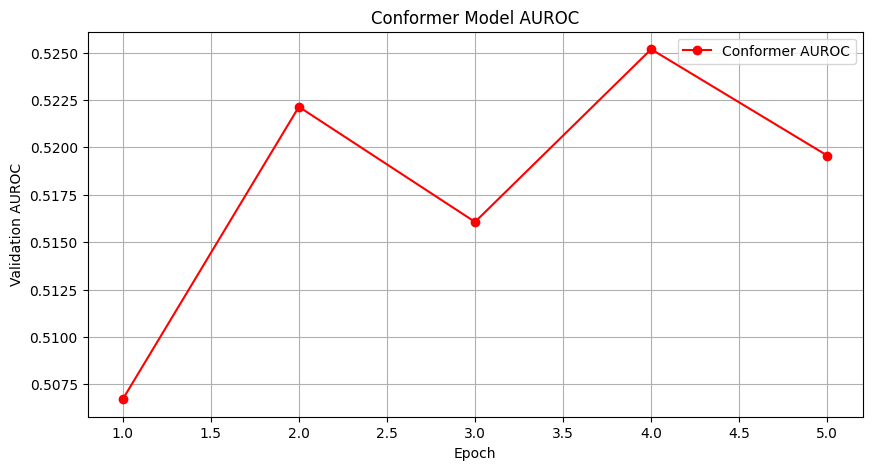

In [34]:
#Conformer Model Eval Function
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========================
# 1. Dataset Class
# ========================
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# ========================
# 2. Stratified Train/Validation Split
# ========================
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size=0.2,
    stratify=labels,    # preserves class distribution
    random_state=42
)

train_dataset = ECGDataset(ecg_data[train_idx], labels[train_idx])
val_dataset   = ECGDataset(ecg_data[val_idx], labels[val_idx])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ========================
# 3. Conformer Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conf_model = ECGConformer().to(device)  # your Conv1D model

# ========================
# 4. Loss and Optimizer
# ========================
loss_fn = nn.BCEWithLogitsLoss()
conf_optimizer = torch.optim.Adam(conf_model.parameters(), lr=1e-3)

# ========================
# 5. Training Loop
# ========================
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)

    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        # ===== TRAINING STEP =====
        pred = model(traces)
        loss = loss_function(pred.squeeze(), diagnoses.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # ========================

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# ========================
# 6. Evaluation Loop
# ========================
def eval_loop(epoch, dataloader, model, loss_function, device):
    model.eval()
    total_loss = 0
    n_entries = 0
    valid_probs = []
    valid_true = []

    eval_pbar = tqdm(dataloader, desc=f"Evaluation Epoch {epoch}", leave=True)
    
    for traces_cpu, diagnoses_cpu in eval_pbar:
        traces, diagnoses = traces_cpu.to(device), diagnoses_cpu.to(device)

        with torch.no_grad():
            pred = model(traces)
            loss = loss_function(pred.squeeze(), diagnoses.float())
            prob = torch.sigmoid(pred)
            valid_probs.append(prob.detach().cpu().numpy())
            valid_true.append(diagnoses.detach().cpu().numpy())

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        eval_pbar.set_postfix({'loss': total_loss / n_entries})

    eval_pbar.close()
    return total_loss / n_entries, np.concatenate(valid_probs, axis=0), np.concatenate(valid_true, axis=0)

# ========================
# 7. Full Training + Evaluation
# ========================
num_epochs = 5
history = {
    "conf_train_loss": [],
    "conf_val_loss": [],
    "conf_val_auroc": []
}

for epoch in range(1, num_epochs + 1):
    conf_train_loss = train_loop(epoch, train_loader, conf_model, conf_optimizer, loss_fn, device)
    conf_val_loss, conf_probs, conf_true = eval_loop(epoch, val_loader, conf_model, loss_fn, device)
    conf_auroc = roc_auc_score(conf_true, conf_probs)

    history["conf_train_loss"].append(conf_train_loss)
    history["conf_val_loss"].append(conf_val_loss)
    history["conf_val_auroc"].append(conf_auroc)

    print(f"\nEpoch {epoch} Summary:")
    print(f"Conformer: Train Loss={conf_train_loss:.4f}, Val Loss={conf_val_loss:.4f}, Val AUROC={conf_auroc:.4f}")

# ========================
# 8. Plot Validation AUROC
# ========================
plt.figure(figsize=(10,5))
plt.plot(range(1,num_epochs+1), history["conf_val_auroc"], 'r-o', label="Conformer AUROC")
plt.xlabel("Epoch")
plt.ylabel("Validation AUROC")
plt.title("Conformer Model AUROC")
plt.legend()
plt.grid(True)
plt.show()

Evaluation Epoch 1: 100%|█████████████████████████████████████████████████| 63/63 [00:00<00:00, 89.33it/s, loss=0.0195]



Epoch 1 Summary:
Train Loss=0.0196, Val Loss=0.0195, Val AUROC=0.5146


Evaluation Epoch 2: 100%|█████████████████████████████████████████████████| 63/63 [00:01<00:00, 32.28it/s, loss=0.0196]



Epoch 2 Summary:
Train Loss=0.0190, Val Loss=0.0196, Val AUROC=0.5134


Evaluation Epoch 3: 100%|█████████████████████████████████████████████████| 63/63 [00:00<00:00, 89.02it/s, loss=0.0197]



Epoch 3 Summary:
Train Loss=0.0186, Val Loss=0.0197, Val AUROC=0.5152


Evaluation Epoch 4: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 123.45it/s, loss=0.0201]


Epoch 00004: reducing learning rate of group 0 to 5.0000e-04.

Epoch 4 Summary:
Train Loss=0.0183, Val Loss=0.0201, Val AUROC=0.5033


Evaluation Epoch 5: 100%|█████████████████████████████████████████████████| 63/63 [00:00<00:00, 99.07it/s, loss=0.0202]



Epoch 5 Summary:
Train Loss=0.0178, Val Loss=0.0202, Val AUROC=0.5063


Evaluation Epoch 6: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 139.67it/s, loss=0.0204]



Epoch 6 Summary:
Train Loss=0.0177, Val Loss=0.0204, Val AUROC=0.5055


Evaluation Epoch 7: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 133.30it/s, loss=0.0206]


Epoch 00007: reducing learning rate of group 0 to 2.5000e-04.

Epoch 7 Summary:
Train Loss=0.0175, Val Loss=0.0206, Val AUROC=0.5000


Evaluation Epoch 8: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 128.26it/s, loss=0.0207]



Epoch 8 Summary:
Train Loss=0.0173, Val Loss=0.0207, Val AUROC=0.5038


Evaluation Epoch 9: 100%|████████████████████████████████████████████████| 63/63 [00:00<00:00, 134.47it/s, loss=0.0208]



Epoch 9 Summary:
Train Loss=0.0172, Val Loss=0.0208, Val AUROC=0.5019


Evaluation Epoch 10: 100%|███████████████████████████████████████████████| 63/63 [00:00<00:00, 119.56it/s, loss=0.0209]


Epoch 00010: reducing learning rate of group 0 to 1.2500e-04.

Epoch 10 Summary:
Train Loss=0.0171, Val Loss=0.0209, Val AUROC=0.5033


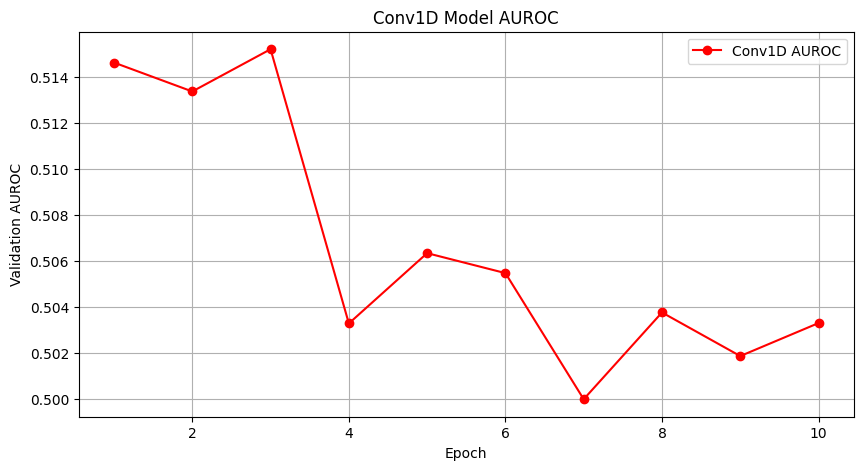

In [35]:
#Combine all for Conv1D Model
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========================
# 1. Dataset Class
# ========================
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# ========================
# 2. Stratified Train/Validation Split
# ========================
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size=0.2,
    stratify=labels,
    random_state=42
)

train_dataset = ECGDataset(ecg_data[train_idx], labels[train_idx])
val_dataset   = ECGDataset(ecg_data[val_idx], labels[val_idx])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ========================
# 3. Conv1D Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_model = ModelBaseline().to(device) 

# ========================
# 4. Loss, Optimizer, Scheduler
# ========================
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(conv_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# ========================
# 5. Training Loop
# ========================
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)
    
    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        optimizer.zero_grad()
        pred = model(traces)
        loss = loss_function(pred.squeeze(), diagnoses.float())
        loss.backward()
        optimizer.step()

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# ========================
# 6. Evaluation Loop
# ========================
def eval_loop(epoch, dataloader, model, loss_function, device):
    model.eval()
    total_loss = 0
    n_entries = 0
    valid_probs = []
    valid_true = []

    eval_pbar = tqdm(dataloader, desc=f"Evaluation Epoch {epoch}", leave=True)
    
    for traces, diagnoses in eval_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)
        with torch.no_grad():
            pred = model(traces)
            loss = loss_function(pred.squeeze(), diagnoses.float())
            prob = torch.sigmoid(pred)
            valid_probs.append(prob.detach().cpu().numpy())
            valid_true.append(diagnoses.detach().cpu().numpy())

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        eval_pbar.set_postfix({'loss': total_loss / n_entries})

    eval_pbar.close()
    return total_loss / n_entries, np.concatenate(valid_probs, axis=0), np.concatenate(valid_true, axis=0)

# ========================
# 7. Full Training + Evaluation with Best Model Saving
# ========================
num_epochs = 10
best_val_loss = float("inf")
history = {"train_loss": [], "val_loss": [], "val_auroc": []}

for epoch in range(1, num_epochs + 1):
    train_loss = train_loop(epoch, train_loader, conv_model, optimizer, loss_fn, device)
    val_loss, val_probs, val_true = eval_loop(epoch, val_loader, conv_model, loss_fn, device)
    val_auroc = roc_auc_score(val_true, val_probs)

    # Scheduler step
    scheduler.step(val_loss)

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(conv_model.state_dict(), "best_conv_model.pth")

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["val_auroc"].append(val_auroc)

    print(f"\nEpoch {epoch} Summary:")
    print(f"Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val AUROC={val_auroc:.4f}")

# ========================
# 8. Plot Validation AUROC
# ========================
plt.figure(figsize=(10,5))
plt.plot(range(1,num_epochs+1), history["val_auroc"], 'r-o', label="Conv1D AUROC")
plt.xlabel("Epoch")
plt.ylabel("Validation AUROC")
plt.title("Conv1D Model AUROC")
plt.legend()
plt.grid(True)
plt.show()


Evaluation Epoch 1: 100%|█████████████████████████████████████████████████| 63/63 [00:12<00:00,  5.19it/s, loss=0.0197]



Epoch 1 Summary:
Train Loss=0.0212, Val Loss=0.0197, Val AUROC=0.5028


Evaluation Epoch 2: 100%|█████████████████████████████████████████████████| 63/63 [00:12<00:00,  5.08it/s, loss=0.0206]



Epoch 2 Summary:
Train Loss=0.0196, Val Loss=0.0206, Val AUROC=0.5067


Evaluation Epoch 3: 100%|█████████████████████████████████████████████████| 63/63 [00:12<00:00,  5.07it/s, loss=0.0194]



Epoch 3 Summary:
Train Loss=0.0197, Val Loss=0.0194, Val AUROC=0.4942


Evaluation Epoch 4: 100%|█████████████████████████████████████████████████| 63/63 [00:13<00:00,  4.73it/s, loss=0.0195]



Epoch 4 Summary:
Train Loss=0.0194, Val Loss=0.0195, Val AUROC=0.5002


Evaluation Epoch 5: 100%|███████████████████████████████████████████████████| 63/63 [00:12<00:00,  4.85it/s, loss=0.02]



Epoch 5 Summary:
Train Loss=0.0193, Val Loss=0.0200, Val AUROC=0.5098


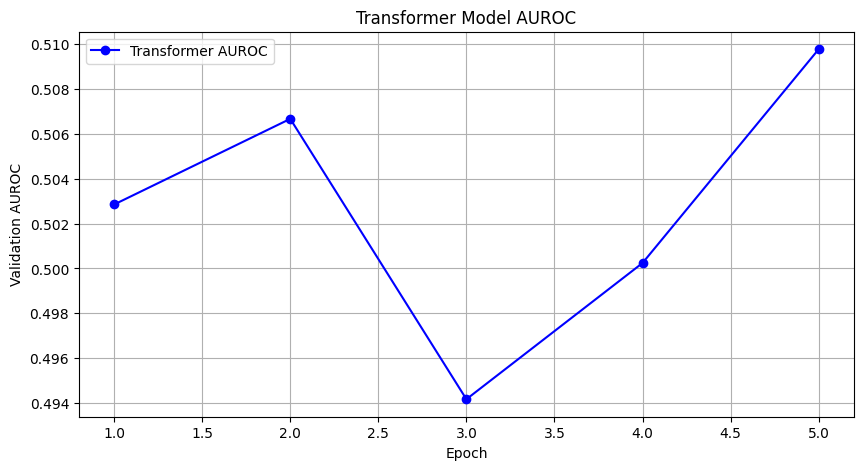

In [37]:
#Combine All for Transformer Model
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========================
# 1. Dataset Class
# ========================
class ECGDataset(Dataset):
    def __init__(self, ecg_data, labels):
        self.ecg_data = torch.tensor(ecg_data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.ecg_data[idx], self.labels[idx]

# ========================
# 2. Stratified Train/Validation Split
# ========================
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size=0.2,
    stratify=labels,
    random_state=42
)

train_dataset = ECGDataset(ecg_data[train_idx], labels[train_idx])
val_dataset   = ECGDataset(ecg_data[val_idx], labels[val_idx])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ========================
# 3. Transformer Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trans_model = ECGTransformer().to(device) 

# ========================
# 4. Loss, Optimizer, Scheduler
# ========================
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(trans_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# ========================
# 5. Training Loop
# ========================
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0
    train_pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=True)
    
    for traces, diagnoses in train_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)

        optimizer.zero_grad()
        pred = model(traces)
        loss = loss_function(pred.squeeze(), diagnoses.float())
        loss.backward()
        optimizer.step()

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        train_pbar.set_postfix({'loss': total_loss / n_entries})

    train_pbar.close()
    return total_loss / n_entries

# ========================
# 6. Evaluation Loop
# ========================
def eval_loop(epoch, dataloader, model, loss_function, device):
    model.eval()
    total_loss = 0
    n_entries = 0
    valid_probs = []
    valid_true = []

    eval_pbar = tqdm(dataloader, desc=f"Evaluation Epoch {epoch}", leave=True)
    
    for traces, diagnoses in eval_pbar:
        traces, diagnoses = traces.to(device), diagnoses.to(device)
        with torch.no_grad():
            pred = model(traces)
            loss = loss_function(pred.squeeze(), diagnoses.float())
            prob = torch.sigmoid(pred)
            valid_probs.append(prob.detach().cpu().numpy())
            valid_true.append(diagnoses.detach().cpu().numpy())

        total_loss += loss.detach().cpu().numpy()
        n_entries += len(traces)
        eval_pbar.set_postfix({'loss': total_loss / n_entries})

    eval_pbar.close()
    return total_loss / n_entries, np.concatenate(valid_probs, axis=0), np.concatenate(valid_true, axis=0)

# ========================
# 7. Full Training + Evaluation with Best Model Saving
# ========================
num_epochs = 5
best_val_loss = float("inf")
history = {"train_loss": [], "val_loss": [], "val_auroc": []}

for epoch in range(1, num_epochs + 1):
    train_loss = train_loop(epoch, train_loader, trans_model, optimizer, loss_fn, device)
    val_loss, val_probs, val_true = eval_loop(epoch, val_loader, trans_model, loss_fn, device)
    val_auroc = roc_auc_score(val_true, val_probs)

    # Scheduler step
    scheduler.step(val_loss)

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(trans_model.state_dict(), "best_trans_model.pth")

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["val_auroc"].append(val_auroc)

    print(f"\nEpoch {epoch} Summary:")
    print(f"Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val AUROC={val_auroc:.4f}")

# ========================
# 8. Plot Validation AUROC
# ========================
plt.figure(figsize=(10,5))
plt.plot(range(1,num_epochs+1), history["val_auroc"], 'b-o', label="Transformer AUROC")
plt.xlabel("Epoch")
plt.ylabel("Validation AUROC")
plt.title("Transformer Model AUROC")
plt.legend()
plt.grid(True)
plt.show()

Using device: cpu
Loading dataset...
Dataset size: 10000
Data split completed.

Defining Conv1D model...
Model ready.

Training started...



Training Epoch 1: 100%|█████████████████████████████████████████████████| 250/250 [00:07<00:00, 32.39it/s, loss=0.0181]

 10%|████████▎                                                                          | 1/10 [00:08<01:17,  8.63s/it]

Epoch 01 | Train Loss: 0.0181 | Val Loss: 0.0165 | AUROC: 0.7787 Model saved



Training Epoch 2: 100%|█████████████████████████████████████████████████| 250/250 [00:04<00:00, 50.08it/s, loss=0.0153]

 20%|████████████████▌                                                                  | 2/10 [00:15<00:59,  7.40s/it]

Epoch 02 | Train Loss: 0.0153 | Val Loss: 0.0156 | AUROC: 0.8044 Model saved



Training Epoch 3: 100%|█████████████████████████████████████████████████| 250/250 [00:11<00:00, 22.42it/s, loss=0.0143]

 30%|████████████████████████▉                                                          | 3/10 [00:27<01:08,  9.75s/it]

Epoch 03 | Train Loss: 0.0143 | Val Loss: 0.0156 | AUROC: 0.8076 Model saved



Training Epoch 4: 100%|█████████████████████████████████████████████████| 250/250 [00:09<00:00, 25.37it/s, loss=0.0137]

 40%|█████████████████████████████████▏                                                 | 4/10 [00:38<01:00, 10.12s/it]

Epoch 04 | Train Loss: 0.0137 | Val Loss: 0.0155 | AUROC: 0.8135 Model saved



Training Epoch 5: 100%|█████████████████████████████████████████████████| 250/250 [00:06<00:00, 38.25it/s, loss=0.0133]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:46<00:47,  9.41s/it]

Epoch 05 | Train Loss: 0.0133 | Val Loss: 0.0156 | AUROC: 0.8129 



Training Epoch 6: 100%|██████████████████████████████████████████████████| 250/250 [00:05<00:00, 47.70it/s, loss=0.013]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:52<00:32,  8.20s/it]

Epoch 06 | Train Loss: 0.0130 | Val Loss: 0.0159 | AUROC: 0.8176 



Training Epoch 7: 100%|█████████████████████████████████████████████████| 250/250 [00:03<00:00, 67.59it/s, loss=0.0127]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:56<00:20,  6.92s/it]

Epoch 07 | Train Loss: 0.0127 | Val Loss: 0.0159 | AUROC: 0.8143 



Training Epoch 8: 100%|█████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.11it/s, loss=0.0124]

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:01<00:12,  6.14s/it]

Epoch 08 | Train Loss: 0.0124 | Val Loss: 0.0160 | AUROC: 0.8144 



Training Epoch 9: 100%|█████████████████████████████████████████████████| 250/250 [00:03<00:00, 67.62it/s, loss=0.0122]

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:05<00:05,  5.58s/it]

Epoch 09 | Train Loss: 0.0122 | Val Loss: 0.0163 | AUROC: 0.8138 



Training Epoch 10: 100%|█████████████████████████████████████████████████| 250/250 [00:03<00:00, 68.19it/s, loss=0.012]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.99s/it]


Epoch 10 | Train Loss: 0.0120 | Val Loss: 0.0167 | AUROC: 0.8141 


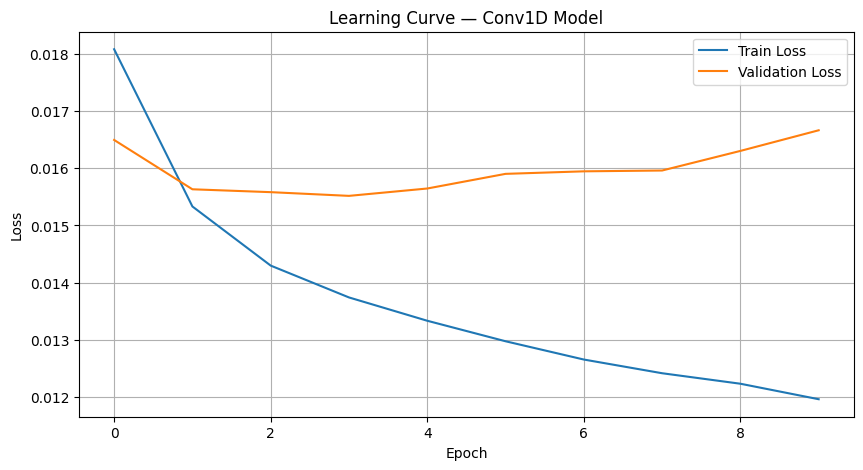

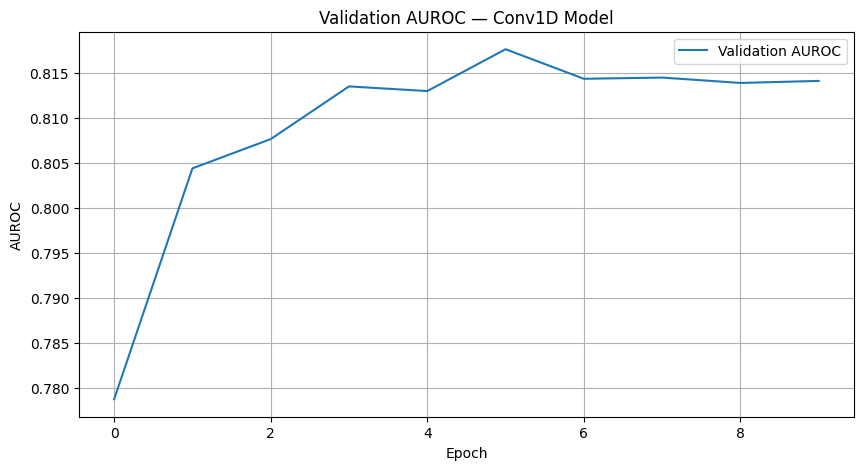

In [38]:
# ======================================================================
# FULL TRAINING SCRIPT INCLUDING HYPERPARAMETER — Conv1D model 
# ======================================================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, random_split, DataLoader
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import h5py

# ======================================================================
# 1. Set seed
# ======================================================================
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# ======================================================================
# 2. Hyperparameters (TASK 1)
# ======================================================================
learning_rate = 1e-3      # tuned
weight_decay = 1e-4       # tuned
num_epochs = 10           # tuned
batch_size = 32           # acceptable

# ======================================================================
# 3. Define Conv1D model - Baseline
# ======================================================================
class ModelBaseline(nn.Module):
    def __init__(self):
        super(ModelBaseline, self).__init__()
        self.kernel_size = 3

        downsample = self._downsample(4096, 128)

        self.conv1 = nn.Conv1d(
            in_channels=8,
            out_channels=32,
            kernel_size=self.kernel_size,
            stride=downsample,
            padding=self._padding(downsample),
            bias=False
        )

        self.relu = nn.ReLU()
        self.lin = nn.Linear(32 * 128, 1)

    def _padding(self, downsample):
        return max(0, int(np.floor((self.kernel_size - downsample + 1) / 2)))

    def _downsample(self, seq_len_in, seq_len_out):
        return seq_len_in // seq_len_out

    def forward(self, x):
        x = x.transpose(2, 1)
        x = self.relu(self.conv1(x))
        x = x.reshape(x.size(0), -1)
        x = self.lin(x)
        return x

# ======================================================================
# 4. Load dataset
# ======================================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Using device: {device}")

tqdm.write("Loading dataset...")

# Paths
path_to_h5_train = 'codesubset/train.h5'
path_to_csv_train = 'codesubset/train.csv'
path_to_records = 'codesubset/train/RECORDS.txt'

# Load ECG tracings
traces = torch.tensor(h5py.File(path_to_h5_train, 'r')['tracings'][()], dtype=torch.float32)

# Load label order from RECORDS.txt
ids_traces = [int(x.split('TNMG')[1]) for x in list(pd.read_csv(path_to_records, header=None)[0])]

# Load CSV (metadata + AF label)
df = pd.read_csv(path_to_csv_train)
df.set_index("id_exam", inplace=True)
df = df.reindex(ids_traces)

labels = torch.tensor(df["AF"].values, dtype=torch.float32).reshape(-1, 1)

dataset = TensorDataset(traces, labels)
len_dataset = len(dataset)
tqdm.write(f"Dataset size: {len_dataset}")

# ======================================================================
# 5. TRAIN/VALID SPLIT (TASK 2)
# ======================================================================
train_size = int(0.8 * len_dataset)
valid_size = len_dataset - train_size

dataset_train, dataset_valid = random_split(dataset, [train_size, valid_size])

train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(dataset_valid, batch_size=batch_size, shuffle=False)

tqdm.write("Data split completed.\n")

# ======================================================================
# 6. Define model (TASK 3)
# ======================================================================
tqdm.write("Defining Conv1D model...")
model = ModelBaseline().to(device)
tqdm.write("Model ready.\n")

# ======================================================================
# 7. Define loss function (TASK 4)
# ======================================================================
loss_function = nn.BCEWithLogitsLoss()

# ======================================================================
# 8. Optimizer
# ======================================================================
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# ======================================================================
# 9. Optional LR Scheduler (TASK optional)
# ======================================================================
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
lr_scheduler = None

# ======================================================================
# 10. Train loop
# ======================================================================
def train_loop(epoch, dataloader, model, optimizer, loss_function, device):
    model.train()
    total_loss = 0
    n_entries = 0

    pbar = tqdm(dataloader, desc=f"Training Epoch {epoch}")

    for traces, labels in pbar:
        traces, labels = traces.to(device), labels.to(device)

        pred = model(traces)
        loss = loss_function(pred, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()
        n_entries += traces.size(0)

        pbar.set_postfix({"loss": total_loss / n_entries})

    return total_loss / n_entries


# ======================================================================
# 11. Eval loop (TASK 5)
# ======================================================================
def eval_loop(epoch, dataloader, model, loss_function, device):
    model.eval()
    total_loss = 0
    n_entries = 0

    all_probs = []
    all_true = []

    pbar = tqdm(dataloader, desc=f"Validation Epoch {epoch}")

    with torch.no_grad():
        for traces, labels in pbar:
            traces, labels = traces.to(device), labels.to(device)

            pred = model(traces)
            loss = loss_function(pred, labels)

            probs = torch.sigmoid(pred).cpu().numpy()
            truth = labels.cpu().numpy()

            all_probs.append(probs)
            all_true.append(truth)

            total_loss += loss.item()
            n_entries += traces.size(0)
            pbar.set_postfix({"loss": total_loss / n_entries})

    return total_loss / n_entries, np.vstack(all_probs), np.vstack(all_true)

# ======================================================================
# 12. Training with metric calculation (TASK 6)
# ======================================================================
best_loss = np.inf
train_loss_all = []
valid_loss_all = []
valid_auc_all = []

tqdm.write("Training started...\n")

for epoch in trange(1, num_epochs + 1):

    train_loss = train_loop(epoch, train_dataloader, model, optimizer, loss_function, device)
    valid_loss, y_pred, y_true = eval_loop(epoch, valid_dataloader, model, loss_function, device)

    train_loss_all.append(train_loss)
    valid_loss_all.append(valid_loss)

    # ---- AUROC metric ----
    try:
        auc = roc_auc_score(y_true, y_pred)
    except:
        auc = float("nan")

    valid_auc_all.append(auc)

    # Save best model
    if valid_loss < best_loss:
        torch.save({"model": model.state_dict()}, "best_conv1d_model.pth")
        best_loss = valid_loss
        saved = "Model saved"
    else:
        saved = ""

    tqdm.write(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | "
               f"Val Loss: {valid_loss:.4f} | AUROC: {auc:.4f} {saved}")

    if lr_scheduler:
        lr_scheduler.step()

# ======================================================================
# 13. Plot learning curves (TASK 7)
# ======================================================================
plt.figure(figsize=(10,5))
plt.plot(train_loss_all, label="Train Loss")
plt.plot(valid_loss_all, label="Validation Loss")
plt.title("Learning Curve — Conv1D Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(valid_auc_all, label="Validation AUROC")
plt.title("Validation AUROC — Conv1D Model")
plt.xlabel("Epoch")
plt.ylabel("AUROC")
plt.grid(True)
plt.legend()
plt.show()

Using device: cpu
Loading dataset...
Train: 8000 | Valid: 2000
Epoch 01 | Train Loss: 0.6172 | Valid Loss: 0.6078 | AUROC: 0.5014
  → Saved best model
Epoch 02 | Train Loss: 0.6132 | Valid Loss: 0.6085 | AUROC: 0.4785
Epoch 03 | Train Loss: 0.6131 | Valid Loss: 0.6090 | AUROC: 0.4921
Epoch 04 | Train Loss: 0.6129 | Valid Loss: 0.6088 | AUROC: 0.4925
Epoch 05 | Train Loss: 0.6128 | Valid Loss: 0.6091 | AUROC: 0.5260
  → Saved best model

Training Done.


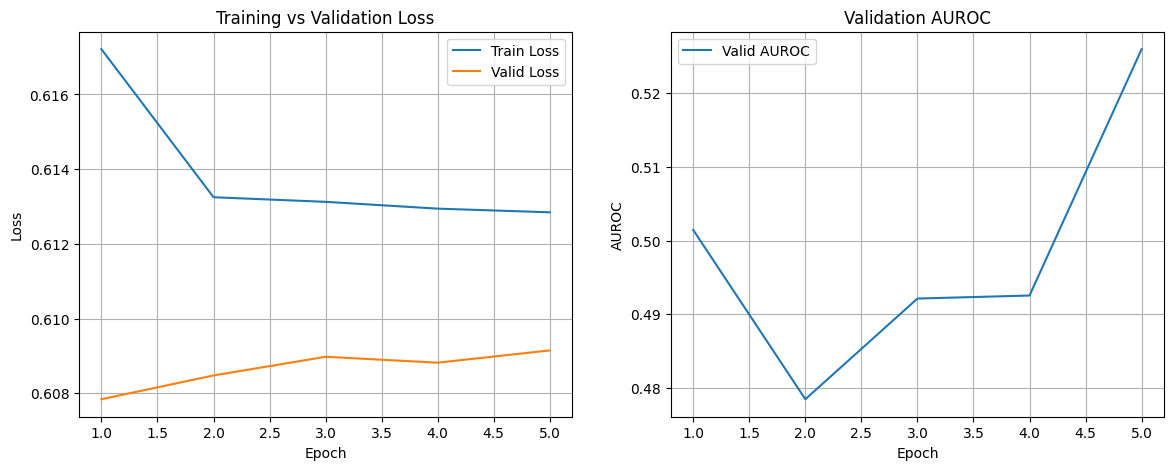

In [52]:
# ======================================================================
# FULL TRAINING SCRIPT INCLUDING HYPERPARAMETER — Transformer Model
# ======================================================================
# ============================================================
# LIBRARIES
# ============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import h5py
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# ============================================================
# SEED & DEVICE
# ============================================================
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")  # Force CPU
print("Using device:", device)

# ============================================================
# HYPERPARAMETERS
# ============================================================
learning_rate = 1e-3
weight_decay = 1e-4
num_epochs = 5
batch_size = 4  # variable of CPU power
patch_size = 32
d_model = 32
num_heads = 2
num_layers = 1

# ============================================================
# DATASET CLASS FOR CPU-LIMITED LOADING
# ============================================================
class ECGDataset(Dataset):
    def __init__(self, path_h5, path_csv, path_records):
        self.h5_file = h5py.File(path_h5, "r")
        self.traces = self.h5_file["tracings"]  # HDF5 dataset (lazy)

        # Load labels
        ids_order = [int(x.split("TNMG")[1]) for x in list(pd.read_csv(path_records, header=None)[0])]
        df = pd.read_csv(path_csv).set_index("id_exam").reindex(ids_order)
        self.labels = df["AF"].values.astype(np.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = torch.tensor(self.traces[idx].astype(np.float32))  # load single sample
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return x, y

# ============================================================
# LOAD DATA
# ============================================================
print("Loading dataset...")
path_h5 = "codesubset/train.h5"
path_csv = "codesubset/train.csv"
path_records = "codesubset/train/RECORDS.txt"

dataset = ECGDataset(path_h5, path_csv, path_records)

# Train/validation split
total_len = len(dataset)
valid_len = int(0.2 * total_len)
train_len = total_len - valid_len

train_dataset, valid_dataset = random_split(dataset, [train_len, valid_len])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

print(f"Train: {len(train_dataset)} | Valid: {len(valid_dataset)}")

# ============================================================
# TRANSFORMER MODEL
# ============================================================
class TransformerECG(nn.Module):
    def __init__(self, d_model=32, n_heads=2, num_layers=1, patch_size=32):
        super().__init__()
        self.patch_size = patch_size
        self.patch_embed = nn.Conv1d(1, d_model, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.zeros(1,1,d_model))
        self.pos_embedding = nn.Parameter(torch.zeros(1,2000,d_model))
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads,
                                                   dropout=0.1, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.patch_embed(x)       # (B, d_model, N)
        x = x.transpose(1,2)          # (B, N, d_model)
        B, N, D = x.shape
        cls = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls, x], dim=1)
        x = x + self.pos_embedding[:, :x.size(1)]
        x = self.encoder(x)
        cls_out = x[:,0]
        out = self.fc(cls_out)
        return out

# ============================================================
# MODEL, LOSS, OPTIMIZER
# ============================================================
model = TransformerECG(d_model=d_model, n_heads=num_heads, num_layers=num_layers,
                       patch_size=patch_size).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ============================================================
# TRAIN + EVAL LOOPS
# ============================================================
def train_one_epoch():
    model.train()
    running_loss = 0
    for x, y in train_loader:
        # reshape: (B, T, C) -> (B, 1, T*C)
        x = x.permute(0,2,1).reshape(x.size(0),1,-1).to(device)
        y = y.view(-1).to(device)
        optimizer.zero_grad()
        logits = model(x).squeeze(-1)
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

def eval_one_epoch():
    model.eval()
    running_loss = 0
    all_preds, all_truths = [], []
    with torch.no_grad():
        for x, y in valid_loader:
            x = x.permute(0,2,1).reshape(x.size(0),1,-1).to(device)
            y = y.view(-1).to(device)
            logits = model(x).squeeze(-1)
            loss = loss_fn(logits, y)
            running_loss += loss.item()
            all_preds.append(torch.sigmoid(logits).cpu().numpy())
            all_truths.append(y.cpu().numpy())
    y_pred = np.concatenate(all_preds)
    y_true = np.concatenate(all_truths)
    try:
        auroc = roc_auc_score(y_true, y_pred)
    except:
        auroc = 0.0
    return running_loss / len(valid_loader), auroc

# ============================================================
# TRAINING LOOP
# ============================================================
train_losses, valid_losses, auc_scores = [], [], []
best_auc = -np.inf

for epoch in range(1, num_epochs+1):
    train_loss = train_one_epoch()
    valid_loss, valid_auc = eval_one_epoch()
    scheduler.step()
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    auc_scores.append(valid_auc)
    
    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | "
          f"Valid Loss: {valid_loss:.4f} | AUROC: {valid_auc:.4f}")
    
    if valid_auc > best_auc:
        best_auc = valid_auc
        torch.save(model.state_dict(), "best_transformer_cpu.pth")
        print("  → Saved best model")

print("\nTraining Done.")

# ============================================================
# PLOT LEARNING CURVES
# ============================================================
epochs = range(1, num_epochs+1)
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, valid_losses, label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs, auc_scores, label="Valid AUROC")
plt.xlabel("Epoch")
plt.ylabel("AUROC")
plt.title("Validation AUROC")
plt.legend()
plt.grid()
plt.show()

Device: cpu
Datasets ready.


Train 1: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [08:02<00:00,  2.07it/s]


Epoch 1 | Train 0.3094 | Val 0.1511 | AUROC 0.9854


Train 2: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [08:18<00:00,  2.01it/s]


Epoch 2 | Train 0.1414 | Val 0.1250 | AUROC 0.9896


Train 3: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [09:26<00:00,  1.77it/s]


Epoch 3 | Train 0.1163 | Val 0.1116 | AUROC 0.9900


Train 4: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [07:58<00:00,  2.09it/s]


Epoch 4 | Train 0.1050 | Val 0.1102 | AUROC 0.9891


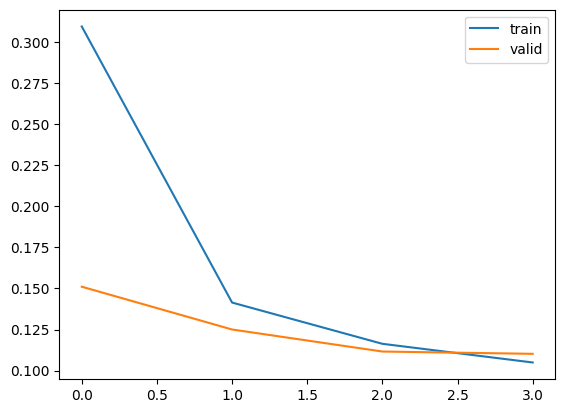

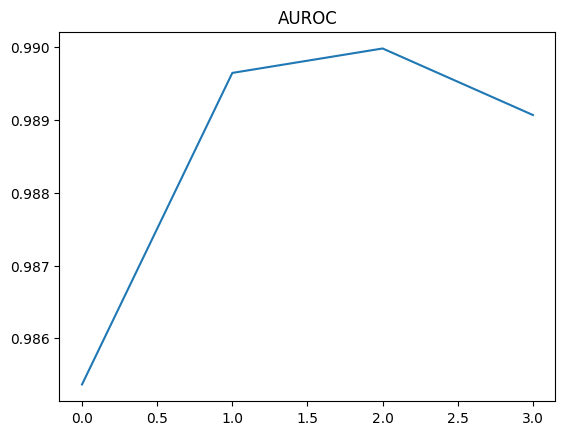

In [48]:
# ======================================================================
# FULL TRAINING SCRIPT INCLUDING HYPERPARAMETER — Conformer Model 
# ======================================================================

# ==========================================================
# 1) Imports
# ==========================================================
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import h5py
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


# ==========================================================
# 2) Lazy Dataset (NO full loading into RAM!)
# ==========================================================
class ECG_H5_Dataset(Dataset):
    def __init__(self, h5_path, csv_path, records_path, indices):
        self.h5_path = h5_path
        self.h5_file = None   # lazy-opened
        self.indices = indices

        # load metadata only (tiny)
        ids_traces = [int(x.split("TNMG")[1]) 
                      for x in list(pd.read_csv(records_path, header=None)[0])]

        df = pd.read_csv(csv_path).set_index("id_exam").reindex(ids_traces)
        self.labels = df["AF"].values.astype(np.float32)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        if self.h5_file is None:
            self.h5_file = h5py.File(self.h5_path, "r")

        real_idx = self.indices[idx]
        x = self.h5_file["tracings"][real_idx]  # (4096, 8)
        y = self.labels[real_idx]

        return torch.tensor(x, dtype=torch.float32), torch.tensor([y], dtype=torch.float32)


# ==========================================================
# 3) Train/Val Split (small arrays only)
# ==========================================================
N = 10000  # from dataset description
idxs = np.arange(N)
np.random.seed(42)
np.random.shuffle(idxs)

train_idx = idxs[:8000]
val_idx = idxs[8000:]

train_dataset = ECG_H5_Dataset("codesubset/train.h5",
                               "codesubset/train.csv",
                               "codesubset/train/RECORDS.txt",
                               train_idx)

val_dataset = ECG_H5_Dataset("codesubset/train.h5",
                             "codesubset/train.csv",
                             "codesubset/train/RECORDS.txt",
                             val_idx)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

print("Datasets ready.")


# ==========================================================
# 4) CPU-friendly Conformer (small)
# ==========================================================
class FeedForward(nn.Module):
    def __init__(self, dim, mult=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, dim*mult),
            nn.GELU(),
            nn.Linear(dim*mult, dim),
            nn.Dropout(0.1)
        )
    def forward(self, x):
        return self.net(x)


class ConformerBlock(nn.Module):
    def __init__(self, dim, heads):
        super().__init__()
        self.ff1 = FeedForward(dim)
        self.ln1 = nn.LayerNorm(dim)
        self.attn = nn.MultiheadAttention(dim, heads, batch_first=True)
        self.ln2 = nn.LayerNorm(dim)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=31, padding=15),
            nn.GELU(),
            nn.BatchNorm1d(dim)
        )
        self.ln3 = nn.LayerNorm(dim)
        self.ff2 = FeedForward(dim)
        self.ln4 = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + 0.5 * self.ff1(self.ln1(x))
        attn_out, _ = self.attn(self.ln2(x), self.ln2(x), self.ln2(x))
        x = x + attn_out
        xc = self.conv(self.ln3(x).transpose(1,2)).transpose(1,2)
        x = x + xc
        x = x + 0.5 * self.ff2(self.ln4(x))
        return x


class ConformerModel(nn.Module):
    def __init__(self, input_leads=8, dim=64, depth=2, heads=2):
        super().__init__()
        self.input_proj = nn.Linear(input_leads, dim)
        self.blocks = nn.ModuleList([ConformerBlock(dim, heads) for _ in range(depth)])
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Linear(dim, 1)

    def forward(self, x):
        x = self.input_proj(x)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1,2)
        x = self.pool(x).squeeze(-1)
        return self.classifier(x)


# ==========================================================
# 5) Downsample (vital!)
# ==========================================================
def downsample(x, factor=8):
    x = x.permute(0,2,1)
    x = F.avg_pool1d(x, kernel_size=factor, stride=factor)
    x = x.permute(0,2,1)
    return x


# ==========================================================
# 6) Training
# ==========================================================
model = ConformerModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
loss_fn = nn.BCEWithLogitsLoss()

train_losses, val_losses, val_aucs = [], [], []
best_auc = -1

for epoch in range(1, 5):
    model.train()
    run_loss = 0
    pbar = tqdm(train_loader, desc=f"Train {epoch}")
    for x, y in pbar:
        x, y = x.to(device), y.to(device)

        x = downsample(x, 8)

        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        run_loss += loss.item()

    train_losses.append(run_loss / len(train_loader))

    # --- validation ---
    model.eval()
    run_v = 0
    all_p, all_t = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            x = downsample(x, 8)
            pred = model(x)
            loss = loss_fn(pred, y)

            run_v += loss.item()
            all_p.append(torch.sigmoid(pred).cpu().numpy())
            all_t.append(y.cpu().numpy())

    all_p = np.vstack(all_p)
    all_t = np.vstack(all_t)
    auc = roc_auc_score(all_t, all_p)

    val_losses.append(run_v / len(val_loader))
    val_aucs.append(auc)

    print(f"Epoch {epoch} | Train {train_losses[-1]:.4f} | Val {val_losses[-1]:.4f} | AUROC {auc:.4f}")


# ==========================================================
# 7) Plot
# ==========================================================
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="valid")
plt.legend()
plt.show()

plt.plot(val_aucs)
plt.title("AUROC")
plt.show()


Device: cpu
Datasets ready.


Train 1: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [05:53<00:00,  2.83it/s]


Epoch 1 | Train 0.5106 | Val 0.4651 | AUROC 0.8394


Train 2: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [06:34<00:00,  2.53it/s]


Epoch 2 | Train 0.4493 | Val 0.4291 | AUROC 0.8561


Train 3: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [18:48<00:00,  1.13s/it]


Epoch 3 | Train 0.4256 | Val 0.4070 | AUROC 0.8759


Train 4: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [09:21<00:00,  1.78it/s]


Epoch 4 | Train 0.4054 | Val 0.4437 | AUROC 0.8711


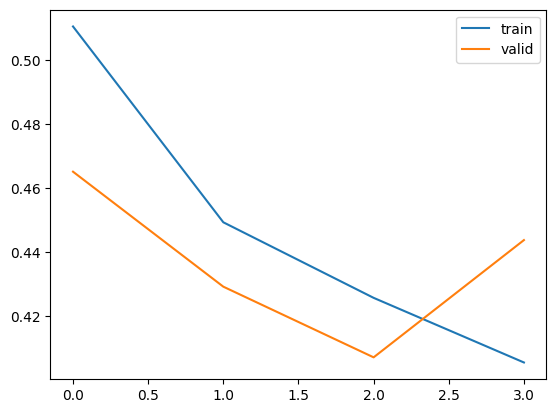

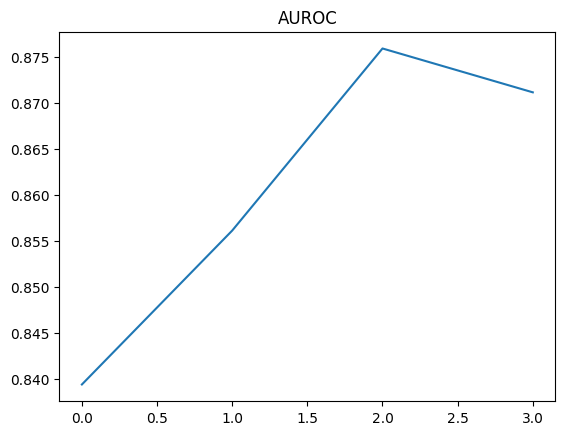

In [17]:
# ======================================================================
# FULL TRAINING SCRIPT INCLUDING HYPERPARAMETER — Transformer Model -revise code 
# ======================================================================

# ==========================================================
# 1) Imports
# ==========================================================
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import h5py
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


# ==========================================================
# 2) Lazy Dataset (NO full loading into RAM!)
# ==========================================================
class ECG_H5_Dataset(Dataset):
    def __init__(self, h5_path, csv_path, records_path, indices):
        self.h5_path = h5_path
        self.h5_file = None   # lazy-opened
        self.indices = indices

        # load metadata only (tiny)
        ids_traces = [int(x.split("TNMG")[1]) 
                      for x in list(pd.read_csv(records_path, header=None)[0])]

        df = pd.read_csv(csv_path).set_index("id_exam").reindex(ids_traces)
        self.labels = df["AF"].values.astype(np.float32)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        if self.h5_file is None:
            self.h5_file = h5py.File(self.h5_path, "r")

        real_idx = self.indices[idx]
        x = self.h5_file["tracings"][real_idx]  # (4096, 8)
        y = self.labels[real_idx]

        return torch.tensor(x, dtype=torch.float32), torch.tensor([y], dtype=torch.float32)


# ==========================================================
# 3) Train/Val Split (small arrays only)
# ==========================================================
N = 10000  # from dataset description
idxs = np.arange(N)
np.random.seed(42)
np.random.shuffle(idxs)

train_idx = idxs[:8000]
val_idx = idxs[8000:]

train_dataset = ECG_H5_Dataset("codesubset/train.h5",
                               "codesubset/train.csv",
                               "codesubset/train/RECORDS.txt",
                               train_idx)

val_dataset = ECG_H5_Dataset("codesubset/train.h5",
                             "codesubset/train.csv",
                             "codesubset/train/RECORDS.txt",
                             val_idx)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

print("Datasets ready.")


# ==========================================================
# 4) CPU-friendly Transformer (small)
# ==========================================================
class TransformerBlock(nn.Module):
    def __init__(self, dim, heads, ff_mult=4, dropout=0.1):
        super().__init__()
        self.ln1 = nn.LayerNorm(dim)
        self.attn = nn.MultiheadAttention(dim, heads, batch_first=True, dropout=dropout)

        self.ln2 = nn.LayerNorm(dim)
        self.ff = nn.Sequential(
            nn.Linear(dim, dim * ff_mult),
            nn.GELU(),
            nn.Linear(dim * ff_mult, dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        # --- Self-Attention ---
        h = self.ln1(x)
        attn_out, _ = self.attn(h, h, h)
        x = x + attn_out

        # --- FeedForward ---
        h = self.ln2(x)
        x = x + self.ff(h)
        return x


class TransformerModel(nn.Module):
    def __init__(self, input_leads=8, dim=64, depth=2, heads=2):
        super().__init__()
        self.input_proj = nn.Linear(input_leads, dim)

        self.blocks = nn.ModuleList([
            TransformerBlock(dim, heads)
            for _ in range(depth)
        ])

        # Global pooling over time
        self.pool = nn.AdaptiveAvgPool1d(1)

        # Binary classifier
        self.classifier = nn.Linear(dim, 1)

    def forward(self, x):
        x = self.input_proj(x)  # (B, T, dim)

        for blk in self.blocks:
            x = blk(x)

        # Pool: (B, T, C) -> (B, C)
        x = x.transpose(1, 2)
        x = self.pool(x).squeeze(-1)

        return self.classifier(x)

# ==========================================================
# 5) Downsample (vital!)
# ==========================================================
def downsample(x, factor=8):
    x = x.permute(0,2,1)
    x = F.avg_pool1d(x, kernel_size=factor, stride=factor)
    x = x.permute(0,2,1)
    return x


# ==========================================================
# 6) Training
# ==========================================================
model = TransformerModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
loss_fn = nn.BCEWithLogitsLoss()

train_losses, val_losses, val_aucs = [], [], []
best_auc = -1

for epoch in range(1, 5):
    model.train()
    run_loss = 0
    pbar = tqdm(train_loader, desc=f"Train {epoch}")
    for x, y in pbar:
        x, y = x.to(device), y.to(device)

        x = downsample(x, 8)

        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        run_loss += loss.item()

    train_losses.append(run_loss / len(train_loader))

    # --- validation ---
    model.eval()
    run_v = 0
    all_p, all_t = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            x = downsample(x, 8)
            pred = model(x)
            loss = loss_fn(pred, y)

            run_v += loss.item()
            all_p.append(torch.sigmoid(pred).cpu().numpy())
            all_t.append(y.cpu().numpy())

    all_p = np.vstack(all_p)
    all_t = np.vstack(all_t)
    auc = roc_auc_score(all_t, all_p)

    val_losses.append(run_v / len(val_loader))
    val_aucs.append(auc)

    print(f"Epoch {epoch} | Train {train_losses[-1]:.4f} | Val {val_losses[-1]:.4f} | AUROC {auc:.4f}")


# ==========================================================
# 7) Plot
# ==========================================================
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="valid")
plt.legend()
plt.show()

plt.plot(val_aucs)
plt.title("AUROC")
plt.show()

In [16]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ----------

In [27]:
!git clone https://{token}@github.com/Livolofsson/ECG-project.git

^C


Cloning into 'ECG-project'...


In [33]:
#!git add Assignment_TaskECG.ipynb
#!git commit -m "Assignment Task of Antonio on ECG"
!git push origin main

fatal: User cancelled dialog.
fatal: unable to connect to cache daemon: Unknown error
git credential-'cache get: -c: line 1: unexpected EOF while looking for matching `''
bash: line 1: /dev/tty: No such device or address
error: failed to execute prompt script (exit code 1)
fatal: could not read Password for 'https://{token}@github.com': No such file or directory


In [ ]:
# ============================================================
# Imports
# ============================================================
import os
import h5py
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

print("✓ Imports loaded")

# ============================================================
# FORCE CPU
# ============================================================
device = torch.device("cpu")
print("Running on:", device)

# ============================================================
# PATHS
# ============================================================
HDF5_ROOT = r"G:\My Drive\Project Work-15 Credits\Dataset\extracted_exams"
CSV_PATH  = r"G:\My Drive\Project Work-15 Credits\Dataset\exams.csv"

# ============================================================
# Hyperparameters
# ============================================================
BATCH_SIZE = 500
LR = 1e-3
EPOCHS = 10
diagnosis_cols = ["1dAVb","RBBB","LBBB","SB","ST","AF"]

# ============================================================
# LOAD CSV
# ============================================================
print("\nLoading CSV...")
df = pd.read_csv(CSV_PATH)
df["exam_id"] = df["exam_id"].astype(str)

df = df.dropna(subset=["death"])
for col in diagnosis_cols + ["normal_ecg", "age", "death"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=diagnosis_cols + ["normal_ecg", "age", "death"])
print("✓ CSV loaded — rows:", len(df))

# ============================================================
# INDEX HDF5 exam IDs (FAST)
# ============================================================
print("\nIndexing HDF5 files...")
existing_ids = {}
hdf5_index = {0: {}, 1: {}}

for part in [0, 1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    print(f"  Scanning part {part}: {h5_path}")

    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)

        for i, eid in enumerate(ids):
            hdf5_index[part][eid] = i

print("✓ Indexed exam IDs")
df["part"] = df["exam_id"].map(lambda x: 0 if x in hdf5_index[0] else (1 if x in hdf5_index[1] else np.nan))
df = df.dropna(subset=["part"])
df["part"] = df["part"].astype(int)
print("✓ Matched HDF5 exams:", len(df))

# ============================================================
# TRAIN/VAL SPLIT
# ============================================================
print("\nSplitting Train / Val...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["death"])
print("✓ Train samples:", len(train_df))
print("✓ Val samples:", len(val_df))

# ============================================================
# Dataset
# ============================================================
class ECGDataset(Dataset):
    def __init__(self, df, root, diag_cols, index_map):
        print("  Initializing dataset with", len(df), "rows")
        self.df = df.reset_index(drop=True)
        self.root = root
        self.diag_cols = diag_cols
        self.index_map = index_map
        print("  ✓ Dataset ready")

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        exam_id = row.exam_id
        part    = row.part
        pos     = self.index_map[part][exam_id]

        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ecg = f["tracings"][pos].astype(np.float32)

        if ecg.shape[0] != 12:
            ecg = ecg.T

        ecg = torch.tensor(ecg, dtype=torch.float32)

        return {
            "ecg": ecg,
            "death": torch.tensor([row.death], dtype=torch.float32),
            "labels": torch.tensor([row[c] for c in self.diag_cols], dtype=torch.float32),
            "age": torch.tensor([row.age], dtype=torch.float32),
            "normal": torch.tensor([row.normal_ecg], dtype=torch.float32),
        }

print("\nCreating datasets...")
train_dataset = ECGDataset(train_df, HDF5_ROOT, diagnosis_cols, hdf5_index)
val_dataset   = ECGDataset(val_df,   HDF5_ROOT, diagnosis_cols, hdf5_index)

print("✓ Datasets created")

# ============================================================
# DataLoaders (FAST CPU)
# ============================================================
def ecg_collate(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
    }

print("\nCreating DataLoaders...")
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=0, collate_fn=ecg_collate)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False,
                        num_workers=0, collate_fn=ecg_collate)

print("✓ Train batches:", len(train_loader))
print("✓ Val batches:", len(val_loader))

# ============================================================
# Model
# ============================================================
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim * 2),
            nn.ReLU(),
            nn.Linear(dim * 2, dim)
        )
        self.attn = nn.MultiheadAttention(dim, 2, batch_first=True)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
            nn.ReLU(),
            nn.Conv1d(dim, dim, kernel_size=1)
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1, 2)).transpose(1, 2)
        return self.norm(x + xc)

class ConformerECG(nn.Module):
    def __init__(self, d_model=64, n_diag=6):
        super().__init__()
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.death = nn.Linear(d_model, 1)
        self.diagnosis = nn.Linear(d_model, n_diag)
        self.age = nn.Linear(d_model, 1)
        self.normal = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.down(x)
        x = self.proj(x)
        x = x.transpose(1, 2)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1, 2)
        x = self.pool(x).squeeze(-1)
        return {
            "death": self.death(x),
            "diagnosis": self.diagnosis(x),
            "age": self.age(x),
            "normal": self.normal(x)
        }

print("\nInitializing model...")
model = ConformerECG().to(device)
bce = nn.BCEWithLogitsLoss()
mse = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min")
print("✓ Model ready")

# ============================================================
# TRAINING
# ============================================================
print("\n================ TRAINING START ================\n")

for epoch in range(EPOCHS):
    print(f"\n----- Epoch {epoch+1}/{EPOCHS} -----")
    model.train()
    train_loss = 0

    for i, batch in enumerate(train_loader):
        out = model(batch["ecg"])
        loss = (
            bce(out["death"], batch["death"]) +
            bce(out["diagnosis"], batch["labels"]) +
            0.1 * mse(out["age"], batch["age"]) +
            bce(out["normal"], batch["normal"])
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        if i % 50 == 0:
            print(f"  Batch {i}/{len(train_loader)} | Loss: {loss.item():.4f}")

    train_loss /= len(train_loader)
    print(f">> Epoch {epoch+1} Train Loss: {train_loss:.4f}")

    # Validation
    model.eval()
    val_loss = 0
    death_true, death_pred = [], []
    normal_true, normal_pred = [], []
    diag_true, diag_pred = [], []

    with torch.no_grad():
        for batch in val_loader:
            out = model(batch["ecg"])

            val_loss += (
                bce(out["death"], batch["death"]) +
                bce(out["diagnosis"], batch["labels"]) +
                0.1 * mse(out["age"], batch["age"]) +
                bce(out["normal"], batch["normal"])
            ).item()

            death_true.extend(batch["death"].numpy().flatten())
            normal_true.extend(batch["normal"].numpy().flatten())
            diag_true.append(batch["labels"].numpy())

            death_pred.extend(torch.sigmoid(out["death"]).numpy().flatten())
            normal_pred.extend(torch.sigmoid(out["normal"]).numpy().flatten())
            diag_pred.append(torch.sigmoid(out["diagnosis"]).numpy())

    val_loss /= len(val_loader)
    scheduler.step(val_loss)
    print(f">> Epoch {epoch+1} Val Loss: {val_loss:.4f}")

# ============================================================
# AUC
# ============================================================
diag_true = np.vstack(diag_true)
diag_pred = np.vstack(diag_pred)

print("\n================ FINAL METRICS ================\n")
print("Death AUC:", roc_auc_score(death_true, death_pred))
print("Normal ECG AUC:", roc_auc_score(normal_true, normal_pred))
print("Diagnosis AUCs:", [roc_auc_score(diag_true[:, i], diag_pred[:, i]) for i in range(len(diagnosis_cols))])


✓ Imports loaded
Running on: cpu

Loading CSV...
✓ CSV loaded — rows: 233647

Indexing HDF5 files...
  Scanning part 0: G:\My Drive\Project Work-15 Credits\Dataset\extracted_exams/exams_part0/exams_part0.hdf5
  Scanning part 1: G:\My Drive\Project Work-15 Credits\Dataset\extracted_exams/exams_part1/exams_part1.hdf5
✓ Indexed exam IDs
✓ Matched HDF5 exams: 28316

Splitting Train / Val...
✓ Train samples: 22652
✓ Val samples: 5664

Creating datasets...
  Initializing dataset with 22652 rows
  ✓ Dataset ready
  Initializing dataset with 5664 rows
  ✓ Dataset ready
✓ Datasets created

Creating DataLoaders...
✓ Train batches: 46
✓ Val batches: 12

Initializing model...
✓ Model ready

================ TRAINING START ================


----- Epoch 1/10 -----


In [3]:
# ============================================================
# Imports
# ============================================================
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from tqdm.notebook import tqdm   # For progress bars

# ============================================================
# FORCE CPU  (Windows-safe)
# ============================================================
device = torch.device("cpu")
print("Running on:", device)

# ============================================================
# Configuration
# ============================================================
HDF5_ROOT = r"G:\My Drive\Project Work-15 Credits\Dataset\extracted_exams"
CSV_PATH  = r"G:\My Drive\Project Work-15 Credits\Dataset\exams.csv"

BATCH_SIZE = 32          # lower = faster on CPU
LR = 1e-3
EPOCHS = 3
diagnosis_cols = ["1dAVb","RBBB","LBBB","SB","ST","AF"]

# ============================================================
# Load and Clean CSV
# ============================================================
df = pd.read_csv(CSV_PATH)
df["exam_id"] = df["exam_id"].astype(str)

df = df.dropna(subset=["death"])

for col in diagnosis_cols + ["normal_ecg", "age", "death"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=diagnosis_cols + ["normal_ecg", "age", "death"])

# --- match HDF5 exam IDs ---
existing_ids = {}
for part in [0, 1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)
        for eid in ids:
            existing_ids[eid] = part

df["part"] = df["exam_id"].map(existing_ids)
df = df.dropna(subset=["part"])
df["part"] = df["part"].astype(int)

# split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["death"], random_state=42)

# ============================================================
# Dataset
# ============================================================
class ECGDataset(Dataset):
    def __init__(self, df, root, diagnosis_cols):
        self.df = df.reset_index(drop=True)
        self.root = root
        self.diagnosis_cols = diagnosis_cols

        for col in diagnosis_cols + ["normal_ecg", "age", "death"]:
            self.df[col] = pd.to_numeric(self.df[col], errors="coerce").fillna(0.0)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        exam_id = row.exam_id
        part = row.part

        # load HDF5
        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ids = f["exam_id"][:].astype(str)
            pos = np.where(ids == exam_id)[0][0]
            ecg = f["tracings"][pos].astype(np.float32)

        if ecg.shape[0] != 12:
            ecg = ecg.T

        return {
            "ecg": torch.tensor(ecg, dtype=torch.float32),
            "death": torch.tensor([row.death], dtype=torch.float32),
            "labels": torch.tensor([row[c] for c in self.diagnosis_cols], dtype=torch.float32),
            "age": torch.tensor([row.age], dtype=torch.float32),
            "normal": torch.tensor([row.normal_ecg], dtype=torch.float32),
        }

# ============================================================
# Collate Function
# ============================================================
def ecg_collate_fn(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
    }

# ============================================================
# Lite Conformer Model
# ============================================================
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim*2),
            nn.ReLU(),
            nn.Linear(dim*2, dim)
        )
        self.attn = nn.MultiheadAttention(dim, 2, batch_first=True)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
            nn.ReLU(),
            nn.Conv1d(dim, dim, kernel_size=1),
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1,2)).transpose(1,2)
        return self.norm(x + xc)

class ConformerECG(nn.Module):
    def __init__(self, d_model=64, num_diagnosis=6):
        super().__init__()
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)

        self.death = nn.Linear(d_model, 1)
        self.diagnosis = nn.Linear(d_model, num_diagnosis)
        self.age = nn.Linear(d_model, 1)
        self.normal = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.down(x)
        x = self.proj(x)
        x = x.transpose(1,2)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1,2)
        x = self.pool(x).squeeze(-1)
        return {
            "death": self.death(x),
            "diagnosis": self.diagnosis(x),
            "age": self.age(x),
            "normal": self.normal(x)
        }

# ============================================================
# Dataloaders (Windows-safe)
# ============================================================
train_dataset = ECGDataset(train_df, HDF5_ROOT, diagnosis_cols)
val_dataset   = ECGDataset(val_df,   HDF5_ROOT, diagnosis_cols)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=0, collate_fn=ecg_collate_fn)

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False,
                        num_workers=0, collate_fn=ecg_collate_fn)

# ============================================================
# Loss, Optimizer
# ============================================================
model = ConformerECG().to(device)
bce = nn.BCEWithLogitsLoss()
mse = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min")

# ============================================================
# Training Loop With tqdm Progress Bars
# ============================================================
for epoch in range(EPOCHS):
    print(f"\n========== Epoch {epoch+1}/{EPOCHS} ==========")

    # ------------------------- TRAIN -------------------------
    model.train()
    train_loss = 0
    train_bar = tqdm(train_loader, desc=f"Training", leave=False)

    for batch in train_bar:
        out = model(batch["ecg"])

        loss = (
            bce(out["death"], batch["death"]) +
            bce(out["diagnosis"], batch["labels"]) +
            0.1 * mse(out["age"], batch["age"]) +
            bce(out["normal"], batch["normal"])
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    train_loss /= len(train_loader)
    print(f"Train Loss: {train_loss:.4f}")

    # ------------------------- VALIDATION -------------------------
    model.eval()
    val_loss = 0
    val_bar = tqdm(val_loader, desc=f"Validating", leave=False)

    death_true, death_pred = [], []
    normal_true, normal_pred = [], []
    diag_true, diag_pred = [], []

    with torch.no_grad():
        for batch in val_bar:
            out = model(batch["ecg"])

            loss = (
                bce(out["death"], batch["death"]) +
                bce(out["diagnosis"], batch["labels"]) +
                0.1 * mse(out["age"], batch["age"]) +
                bce(out["normal"], batch["normal"])
            )
            val_loss += loss.item()
            val_bar.set_postfix({"loss": f"{loss.item():.4f}"})

            # collect targets/preds
            death_true.extend(batch["death"].numpy().flatten())
            normal_true.extend(batch["normal"].numpy().flatten())
            diag_true.append(batch["labels"].numpy())

            death_pred.extend(torch.sigmoid(out["death"]).numpy().flatten())
            normal_pred.extend(torch.sigmoid(out["normal"]).numpy().flatten())
            diag_pred.append(torch.sigmoid(out["diagnosis"]).numpy())

    val_loss /= len(val_loader)
    scheduler.step(val_loss)
    print(f"Val Loss:   {val_loss:.4f}")

# ============================================================
# Final AUC Scores
# ============================================================
diag_true = np.vstack(diag_true)
diag_pred = np.vstack(diag_pred)

print("\n===== FINAL METRICS =====")
print("Death AUC:", roc_auc_score(death_true, death_pred))
print("Normal ECG AUC:", roc_auc_score(normal_true, normal_pred))
print("Diagnosis AUCs:", [roc_auc_score(diag_true[:, i], diag_pred[:, i]) for i in range(len(diagnosis_cols))])

Running on: cpu

========== Epoch 1/3 ==========


Training:   0%|          | 0/708 [00:00<?, ?it/s]

KeyboardInterrupt: 

Device: cpu | GPU available: False
Using torch.cuda.amp (AMP available)
num_workers chosen: 0
Loading CSV: D:\Semester-4\15 Credit project work\Download\exams.csv
Rows before cleaning: 345779, after dropna: 233647
Indexing HDF5 files under: D:\Semester-4\15 Credit project work\Download\extracted_Dataset
Indexed HDF5 exam ids: 40001
Rows after mapping to HDF5: 28316
Splitting train/val (stratify on death)...
Train: 22652 Val: 5664
Preparing datasets and loaders...
Train batches: 236 Val batches: 59

=== TRAINING START ===


Epoch 1/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 1 Train Loss: 167.2093


Epoch 1/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 1 Val Loss: 84.7239
AUROCs: {1: '0.4923', 2: '0.4891', 3: '0.5442', 4: '0.5651', 5: '0.5456', 6: '0.5187', 7: '0.5645'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 2/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 2 Train Loss: 52.1080


Epoch 2/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 2 Val Loss: 40.2992
AUROCs: {1: '0.5034', 2: '0.4982', 3: '0.5367', 4: '0.5556', 5: '0.5360', 6: '0.4960', 7: '0.5606'}


Epoch 3/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 3 Train Loss: 40.1654


Epoch 3/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 3 Val Loss: 39.7263
AUROCs: {1: '0.4996', 2: '0.5022', 3: '0.5266', 4: '0.5558', 5: '0.5562', 6: '0.4839', 7: '0.5656'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 4/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 4 Train Loss: 40.1129


Epoch 4/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 4 Val Loss: 39.7107
AUROCs: {1: '0.5036', 2: '0.4831', 3: '0.5309', 4: '0.5587', 5: '0.5695', 6: '0.4824', 7: '0.5669'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 5/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 5 Train Loss: 40.0996


Epoch 5/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 5 Val Loss: 39.6462
AUROCs: {1: '0.5154', 2: '0.4388', 3: '0.5544', 4: '0.5652', 5: '0.4739', 6: '0.4194', 7: '0.5736'}


Epoch 6/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 6 Train Loss: 33.5389


Epoch 6/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 6 Val Loss: 28.3074
AUROCs: {1: '0.5804', 2: '0.6333', 3: '0.6702', 4: '0.6796', 5: '0.6559', 6: '0.6616', 7: '0.6397'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 7/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 7 Train Loss: 26.5679


Epoch 7/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 7 Val Loss: 24.8815
AUROCs: {1: '0.6927', 2: '0.6942', 3: '0.7192', 4: '0.7156', 5: '0.7029', 6: '0.7130', 7: '0.6881'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 8/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 8 Train Loss: 23.6665


Epoch 8/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 8 Val Loss: 22.9839
AUROCs: {1: '0.7103', 2: '0.7094', 3: '0.7172', 4: '0.7193', 5: '0.7040', 6: '0.7194', 7: '0.6852'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 9/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 9 Train Loss: 22.3605


Epoch 9/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 9 Val Loss: 22.8475
AUROCs: {1: '0.7006', 2: '0.7016', 3: '0.7166', 4: '0.7216', 5: '0.7082', 6: '0.7164', 7: '0.7076'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


Epoch 10/10 Train:   0%|          | 0/236 [00:00<?, ?it/s]

Epoch 10 Train Loss: 21.5982


Epoch 10/10 Val:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch 10 Val Loss: 21.9192
AUROCs: {1: '0.6927', 2: '0.7313', 3: '0.7452', 4: '0.7317', 5: '0.7336', 6: '0.7400', 7: '0.7268'}
Saved best model to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\best_model_5yr.pth


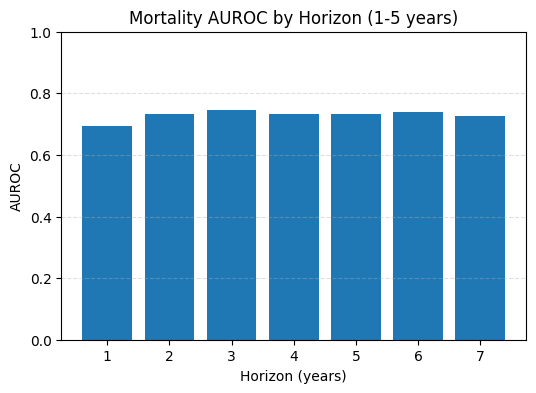

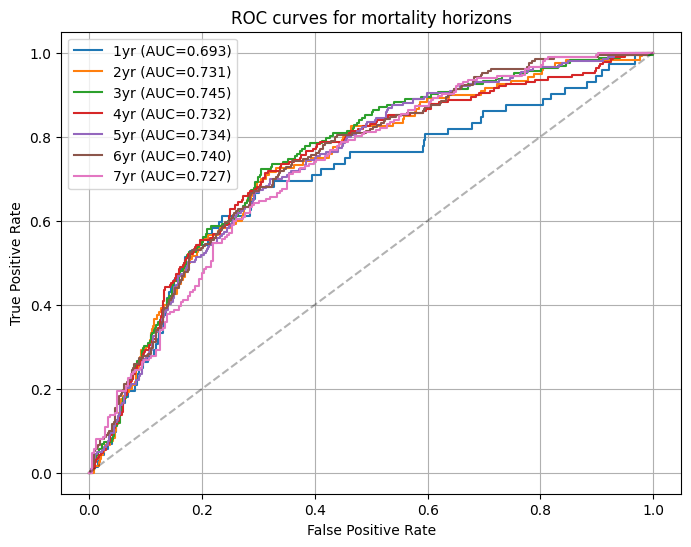

Saving validation predictions...


Saved predictions to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\val_mortality_preds_by_horizon.csv
Saved history to D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality\history.json
Done.


In [1]:
#Year MOrtality prediction with Conformer
############################################


import os
import time
import json
import h5py
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqtnb
from tqdm import tqdm as tqd
import multiprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from contextlib import contextmanager

# ------------------------
# USER CONFIG - change these
# ------------------------
#HDF5_ROOT = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"  # <- change
#CSV_PATH  = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"        # <- change
#SAVE_DIR  = "./results_mortality"  # output directory
HDF5_ROOT = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset"
CSV_PATH  = r"D:\Semester-4\15 Credit project work\Download\exams.csv"
SAVE_DIR  = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality"
os.makedirs(SAVE_DIR, exist_ok=True)

# Model / training hyperparams
BATCH_SIZE = 96
EPOCHS = 10
LR = 1e-3
ACCUM = 1                # gradient accumulation steps
DIAGNOSIS_COLS = ["1dAVb","RBBB","LBBB","SB","ST","AF"]
HORIZONS = [1,2,3,4,5,6,7]   # years to evaluate
SEED = 42

# ------------------------
# Environment / device / AMP
# ------------------------
torch.manual_seed(SEED)
np.random.seed(SEED)

USE_GPU = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_GPU else "cpu")
print("Device:", DEVICE, "| GPU available:", USE_GPU)

# ================================
# UNIVERSAL AMP IMPORT (WORKS CPU/GPU)
# ================================
try:
    from torch.cuda.amp import GradScaler, autocast
    print("Using torch.cuda.amp (AMP available)")
except Exception:
    print("AMP NOT available, using dummy GradScaler/autocast")

    class GradScaler:
        def __init__(self, enabled=False): pass
        def scale(self, loss): return loss
        def step(self, optimizer): optimizer.step()
        def update(self): pass

    @contextmanager
    def autocast(enabled=False):
        yield

scaler = GradScaler(enabled=USE_GPU)
# Provide a safe autocast context manager for CPU/GPU
if USE_GPU:
    @contextmanager
    def autocast_ctx():
        with autocast(device_type="cuda", enabled=True):
            yield
else:
    @contextmanager
    def autocast_ctx():
        yield

# ------------------------
# Helper: pick tqdm variant
# ------------------------
def get_tqdm():
    try:
        # prefer notebook tqdm if running in a notebook
        return tqtnb
    except Exception:
        return tqd

TQDM = get_tqdm()

# ------------------------
# Utility: choose num_workers safely
# ------------------------
def recommended_num_workers():
    cpu = multiprocessing.cpu_count()
    # If on Windows/Jupyter use 0 or 1 for safety
    if os.name == "nt":
        return 0
    # typical safe value: min(2, cpu-1)
    return max(0, min(2, cpu - 1))

NUM_WORKERS = recommended_num_workers()
print("num_workers chosen:", NUM_WORKERS)

# ------------------------
# Load CSV and check time column
# ------------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH, low_memory=False)
df["exam_id"] = df["exam_id"].astype(str)

# check for a time column: prefer 'timey' (years), else 'time_days' or 'followup_days'
if "timey" not in df.columns:
    if "time_days" in df.columns:
        print("Converting time_days -> timey (years)")
        df["timey"] = df["time_days"].astype(float) / 365.25
    elif "followup_days" in df.columns:
        print("Converting followup_days -> timey (years)")
        df["timey"] = df["followup_days"].astype(float) / 365.25
    else:
        # If no time column present, we'll error out later — but set a placeholder
        print("Warning: no 'timey' or 'time_days' found. You must provide follow-up time; using zeros as placeholder.")
        df["timey"] = 0.0

# Ensure numeric columns exist and convert
for col in DIAGNOSIS_COLS + ["normal_ecg", "age", "death", "timey"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # create column of zeros if missing (diagnosis missing -> zeros)
        default = 0.0
        if col == "age":
            default = 0.0
        df[col] = default

# Drop rows with missing critical values
initial_rows = len(df)
df = df.dropna(subset=["death", "timey"] + DIAGNOSIS_COLS + ["normal_ecg", "age"])
print(f"Rows before cleaning: {initial_rows}, after dropna: {len(df)}")

# ------------------------
# Build HDF5 index (pre-index exams in parts 0/1)
# ------------------------
print("Indexing HDF5 files under:", HDF5_ROOT)
hdf5_index = {}
for part in [0,1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    if not os.path.exists(h5_path):
        print("Warning: HDF5 not found:", h5_path)
        continue
    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)
        for i, eid in enumerate(ids):
            hdf5_index[eid] = (part, i)
print("Indexed HDF5 exam ids:", len(hdf5_index))

# Map part indices into df, drop rows not in HDF5
df["part"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[0])
df["h5pos"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[1])
df = df.dropna(subset=["part", "h5pos"])
df["part"] = df["part"].astype(int)
df["h5pos"] = df["h5pos"].astype(int)
print("Rows after mapping to HDF5:", len(df))

# ------------------------
# Train / val split
# ------------------------
print("Splitting train/val (stratify on death)...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df["death"])
print("Train:", len(train_df), "Val:", len(val_df))

# Save small info
pd.DataFrame({"n_train":[len(train_df)], "n_val":[len(val_df)]}).to_csv(os.path.join(SAVE_DIR,"split_info.csv"), index=False)

# ------------------------
# Dataset (uses pre-indexed pos & part)
# ------------------------
class ECGDatasetSurvival(Dataset):
    def __init__(self, df, hdf5_root, diag_cols, horizons=HORIZONS):
        self.df = df.reset_index(drop=True).copy()
        self.root = hdf5_root
        self.diag_cols = diag_cols
        self.horizons = horizons

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        part = int(row.part)
        pos = int(row.h5pos)
        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ecg = f["tracings"][pos].astype(np.float32)
        if ecg.shape[0] != 12:
            ecg = ecg.T
        ecg = torch.tensor(ecg, dtype=torch.float32)   # (12, L)
        # scalars
        death = float(row.death)
        timey = float(row.timey)
        labels_diag = torch.tensor([float(row[c]) for c in self.diag_cols], dtype=torch.float32)
        age = float(row.age)
        normal = float(row.normal_ecg)
        return {
            "ecg": ecg,
            "death": torch.tensor([death], dtype=torch.float32),
            "timey": torch.tensor([timey], dtype=torch.float32),
            "labels": labels_diag,
            "age": torch.tensor([age], dtype=torch.float32),
            "normal": torch.tensor([normal], dtype=torch.float32),
            "exam_id": str(row.exam_id),
            "patient_id": row.get("patient_id", None)
        }

def collate_surv(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "timey": torch.stack([b["timey"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
        "exam_id": [b["exam_id"] for b in batch],
        "patient_id": [b["patient_id"] for b in batch],
    }

# ------------------------
# Model: Lite Conformer with multi-horizon death head
# ------------------------
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(nn.LayerNorm(dim), nn.Linear(dim, dim*2), nn.ReLU(), nn.Linear(dim*2, dim))
        self.attn = nn.MultiheadAttention(dim, num_heads=2, batch_first=True)
        self.conv = nn.Sequential(nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
                                  nn.ReLU(), nn.Conv1d(dim, dim, kernel_size=1))
        self.norm = nn.LayerNorm(dim)
    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1,2)).transpose(1,2)
        return self.norm(x + xc)

class ConformerECG_MultiHorizon(nn.Module):
    def __init__(self, d_model=64, num_diag=len(DIAGNOSIS_COLS), n_horizons=len(HORIZONS)):
        super().__init__()
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.death = nn.Linear(d_model, n_horizons)
        self.diagnosis = nn.Linear(d_model, num_diag)
        self.age = nn.Linear(d_model, 1)
        self.normal = nn.Linear(d_model, 1)
    def forward(self, x):
        x = self.down(x)
        x = self.proj(x)
        x = x.transpose(1,2)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1,2)
        x = self.pool(x).squeeze(-1)
        return {"death": self.death(x), "diagnosis": self.diagnosis(x), "age": self.age(x), "normal": self.normal(x)}

# ------------------------
# Multi-horizon masked BCE loss
# ------------------------
bce_logits = nn.BCEWithLogitsLoss(reduction="none")
mse_loss_fn = nn.MSELoss()

def death_horizon_loss(logits, timey, event, horizons=HORIZONS):
    """
    logits: (B,H), timey/event: (B,1)
    returns: (loss scalar, labels_np (B,H), mask_np (B,H) bool)
    """
    B, H = logits.shape
    device = logits.device
    timey = timey.squeeze(1)
    event = event.squeeze(1)
    labels = torch.zeros((B,H), device=device)
    mask = torch.zeros((B,H), device=device)
    for i,k in enumerate(horizons):
        valid = (event == 1) | (timey >= float(k))
        mask[:, i] = valid.float()
        label_pos = (event == 1) & (timey <= float(k))
        labels[:, i] = label_pos.float()
    loss_mat = bce_logits(logits, labels)
    masked_sum = (loss_mat * mask).sum()
    denom = mask.sum().clamp_min(1.0)
    loss = masked_sum / denom
    return loss, labels.detach().cpu().numpy(), mask.detach().cpu().numpy().astype(bool)

# ------------------------
# Build datasets & loaders
# ------------------------
print("Preparing datasets and loaders...")
train_ds = ECGDatasetSurvival(train_df, HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)
val_ds   = ECGDatasetSurvival(val_df,   HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_surv)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_surv)

print("Train batches:", len(train_loader), "Val batches:", len(val_loader))

# ------------------------
# Instantiate model, optimizer, scheduler
# ------------------------
model = ConformerECG_MultiHorizon().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2, verbose=True)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)
# ------------------------
# Training loop with tqdm + AMP if GPU
# ------------------------
best_val5 = -np.inf
history = {"train_loss": [], "val_loss": [], "aucs": []}

PROG = TQDM

print("\n=== TRAINING START ===")
for epoch in range(1, EPOCHS+1):
    model.train()
    running = 0.0
    it = 0
    train_bar = PROG(train_loader, desc=f"Epoch {epoch}/{EPOCHS} Train", leave=False)
    for batch in train_bar:
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].to(DEVICE)
        event = batch["death"].to(DEVICE)
        labels_diag = batch["labels"].to(DEVICE)
        age = batch["age"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)

        with autocast_ctx():
            out = model(x)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, _, _ = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            loss = death_loss + diag_loss + 0.1*age_loss + normal_loss
            loss_val = loss.item()

        optimizer.zero_grad()
        if USE_GPU:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running += loss_val
        it += 1
        if it % 10 == 0:
            train_bar.set_postfix(loss=f"{running/it:.4f}")

    avg_train_loss = running / max(1, it)
    history["train_loss"].append(avg_train_loss)
    print(f"Epoch {epoch} Train Loss: {avg_train_loss:.4f}")

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_running = 0.0
    all_preds = {k: [] for k in HORIZONS}
    all_labels = {k: [] for k in HORIZONS}

    val_bar = PROG(val_loader, desc=f"Epoch {epoch}/{EPOCHS} Val", leave=False)
    with torch.no_grad():
        for batch in val_bar:
            x = batch["ecg"].to(DEVICE)
            timey = batch["timey"].to(DEVICE)
            event = batch["death"].to(DEVICE)
            labels_diag = batch["labels"].to(DEVICE)
            age = batch["age"].to(DEVICE)
            normal = batch["normal"].to(DEVICE)

            out = model(x)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, labels_np, mask_np = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            val_running += (death_loss.item() + diag_loss.item() + 0.1*age_loss.item() + normal_loss.item())

            probs = torch.sigmoid(death_logits).cpu().numpy()   # (B,H)
            # labels_np, mask_np are np arrays
            for h_idx, k in enumerate(HORIZONS):
                mask_h = mask_np[:, h_idx]
                if mask_h.sum() == 0:
                    continue
                preds_h = probs[mask_h, h_idx]
                labs_h  = labels_np[mask_h, h_idx]
                all_preds[k].extend(preds_h.tolist())
                all_labels[k].extend(labs_h.tolist())

    avg_val_loss = val_running / max(1, len(val_loader))
    history["val_loss"].append(avg_val_loss)
    print(f"Epoch {epoch} Val Loss: {avg_val_loss:.4f}")

    # compute AUROCs per horizon
    aucs = {}
    for k in HORIZONS:
        y_true = np.array(all_labels[k])
        y_score = np.array(all_preds[k])
        if len(y_true) == 0 or len(np.unique(y_true)) < 2:
            aucs[k] = np.nan
        else:
            try:
                aucs[k] = roc_auc_score(y_true, y_score)
            except Exception:
                aucs[k] = np.nan
    history["aucs"].append(aucs)
    print("AUROCs:", {k: (f"{aucs[k]:.4f}" if not np.isnan(aucs[k]) else "nan") for k in HORIZONS})

    # save best by 5yr AUC
    val5 = aucs.get(5, np.nan)
    if not np.isnan(val5) and val5 > best_val5:
        best_val5 = val5
        best_path = os.path.join(SAVE_DIR, "best_model_5yr.pth")
        torch.save(model.state_dict(), best_path)
        print("Saved best model to", best_path)

    # scheduler step on val loss
    scheduler.step(avg_val_loss)

# ------------------------
# After training: plots and final metrics
# ------------------------
# Use last epoch's aucs (history["aucs"][-1])
final_aucs = history["aucs"][-1] if len(history["aucs"])>0 else {}
years = HORIZONS
aucs_plot = [final_aucs.get(k, np.nan) for k in years]

plt.figure(figsize=(6,4))
plt.bar(years, [x if not np.isnan(x) else 0 for x in aucs_plot], color="C0")
plt.ylim(0.0, 1.0)
plt.xlabel("Horizon (years)")
plt.ylabel("AUROC")
plt.title("Mortality AUROC by Horizon (1-5 years)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(years)
plt.show()

# ROC curves for available horizons
plt.figure(figsize=(8,6))
plotted = 0
for k in HORIZONS:
    y_true = np.array(all_labels[k]) if 'all_labels' in locals() else np.array([])
    y_score = np.array(all_preds[k]) if 'all_preds' in locals() else np.array([])
    if len(y_true) == 0 or len(np.unique(y_true)) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{k}yr (AUC={roc_auc_score(y_true,y_score):.3f})")
    plotted += 1

if plotted > 0:
    plt.plot([0,1],[0,1],"k--", alpha=0.3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves for mortality horizons")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No ROC curves to plot (not enough valid samples per horizon).")

# ------------------------
# Save predictions on validation set
# ------------------------
print("Saving validation predictions...")
pred_rows = []
model.eval()
with torch.no_grad():
    for batch in tqd(val_loader, desc="Save preds", leave=False):
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].numpy().flatten()
        event = batch["death"].numpy().flatten()
        exam_ids = batch["exam_id"]
        out = model(x)
        probs = torch.sigmoid(out["death"]).cpu().numpy()
        for i, eid in enumerate(exam_ids):
            row = {"exam_id": eid, "death": int(event[i]), "timey": float(timey[i])}
            for h_idx, k in enumerate(HORIZONS):
                row[f"pred_p_{k}yr"] = float(probs[i, h_idx])
            pred_rows.append(row)

pred_df = pd.DataFrame(pred_rows)
pred_path = os.path.join(SAVE_DIR, "val_mortality_preds_by_horizon.csv")
pred_df.to_csv(pred_path, index=False)
print("Saved predictions to", pred_path)

# Save training history
with open(os.path.join(SAVE_DIR, "history.json"), "w") as f:
    json.dump(history, f, indent=2)
print("Saved history to", os.path.join(SAVE_DIR, "history.json"))

print("Done.")